In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics as stat
import os
import math
from seaborn import set_style
from copy import deepcopy

set_style('white')

In [156]:
#Load data and get data for the last 10 days
n=10
X_train_raw = pd.read_csv('data/X_train.csv') 
length = len(X_train_raw)
X_test = X_train_raw.iloc[-211*n:].reset_index(drop=True)
X_test

open 0   open 1   open 2   open 3   open 4   open 5   open 6   open 7  \
0     438.680  439.000  438.990  439.310  439.380  439.100  439.150  439.420   
1     439.000  438.990  439.310  439.380  439.100  439.150  439.420  439.160   
2     438.990  439.310  439.380  439.100  439.150  439.420  439.160  439.060   
3     439.310  439.380  439.100  439.150  439.420  439.160  439.060  439.215   
4     439.380  439.100  439.150  439.420  439.160  439.060  439.215  438.990   
...       ...      ...      ...      ...      ...      ...      ...      ...   
2105  445.860  445.950  445.980  446.015  446.110  445.880  445.740  445.700   
2106  445.950  445.980  446.015  446.110  445.880  445.740  445.700  445.775   
2107  445.980  446.015  446.110  445.880  445.740  445.700  445.775  445.840   
2108  446.015  446.110  445.880  445.740  445.700  445.775  445.840  445.780   
2109  446.110  445.880  445.740  445.700  445.775  445.840  445.780  445.860   

       open 8   open 9  ...  MACD_Signal 114  MACD_Signal 115  \
0     439.160  439.060  ...           0.0274           0.0237   
1     439.060  439.215  ...           0.0237           0.0338   
2     439.215  438.990  ...           0.0338           0.0513   
3     438.990  439.090  ...           0.0513           0.0804   
4     439.090  439.100  ...           0.0804           0.1148   
...       ...      ...  ...              ...              ...   
2105  445.775  445.840  ...          -0.0541          -0.0546   
2106  445.840  445.780  ...          -0.0546          -0.0561   
2107  445.780  445.860  ...          -0.0561          -0.0577   
2108  445.860  445.820  ...          -0.0577          -0.0589   
2109  445.820  445.660  ...          -0.0589          -0.0620   

      MACD_Signal 116  MACD_Signal 117  MACD_Signal 118  MACD_Signal 119  \
0              0.0338           0.0513           0.0804           0.1148   
1              0.0513           0.0804           0.1148           0.1576   
2              0.0804           0.1148           0.1576           0.1950   
3              0.1148           0.1576           0.1950           0.2289   
4              0.1576           0.1950           0.2289           0.2556   
...               ...              ...              ...              ...   
2105          -0.0561          -0.0577          -0.0589          -0.0620   
2106          -0.0577          -0.0589          -0.0620          -0.0653   
2107          -0.0589          -0.0620          -0.0653          -0.0682   
2108          -0.0620          -0.0653          -0.0682          -0.0710   
2109          -0.0653          -0.0682          -0.0710          -0.0741   

      variance  crossover     c1     c2  
0     2.052486  -0.123217  115.0  110.0  
1     2.045321  -0.122310  114.0  109.0  
2     2.030896  -0.154302  113.0  108.0  
3     2.016270  -0.150437  112.0  107.0  
4     1.993536  -0.157565  111.0  106.0  
...        ...        ...    ...    ...  
2105  0.119762  -0.298183  114.0   89.0  
2106  0.122555  -0.279980  113.0   88.0  
2107  0.124656  -0.272631  112.0   87.0  
2108  0.126760  -0.275076  111.0   86.0  
2109  0.128967  -0.274812  110.0   85.0  

[2110 rows x 484 columns]

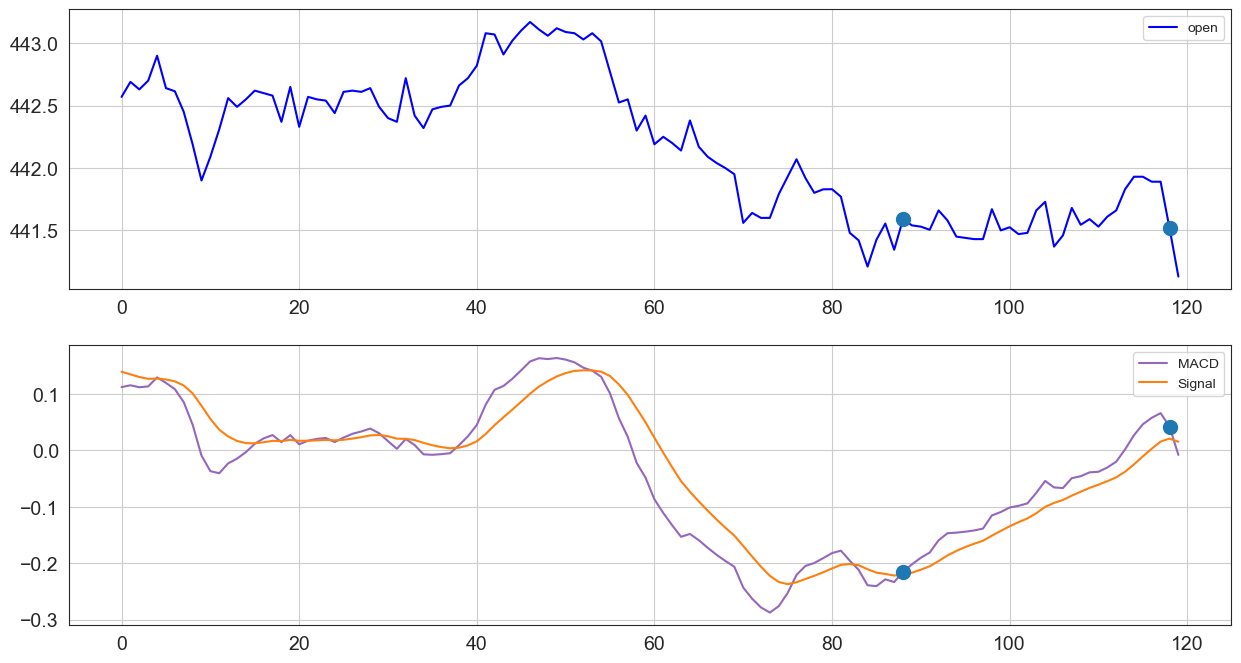

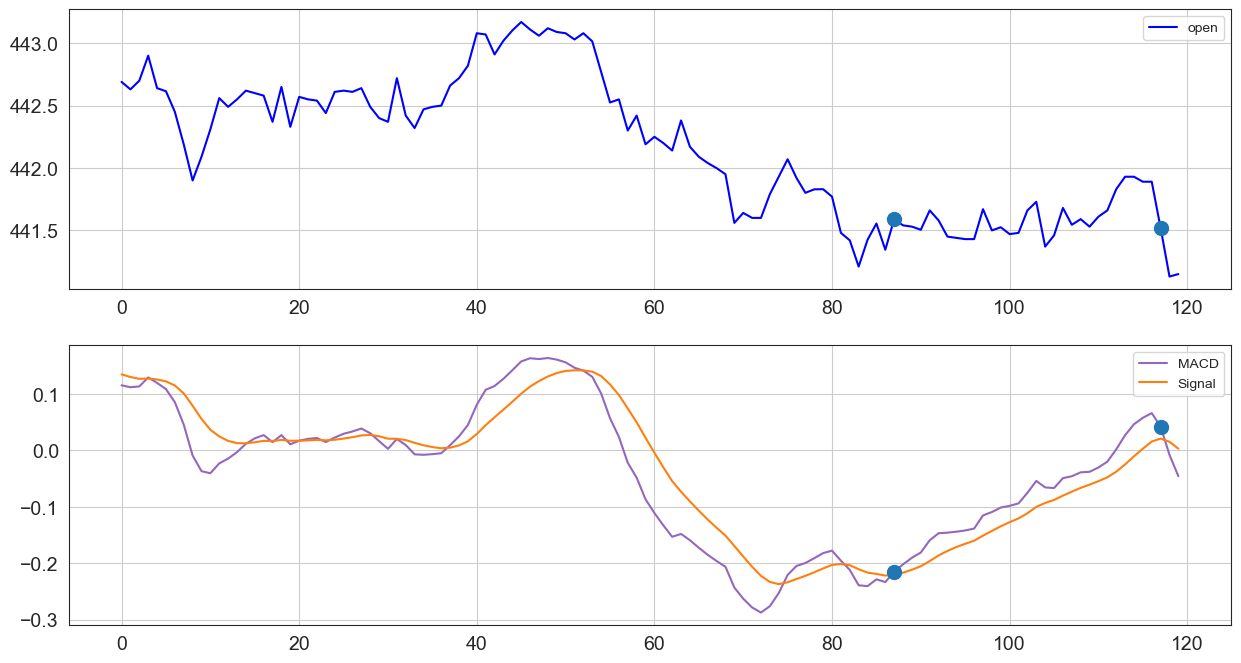

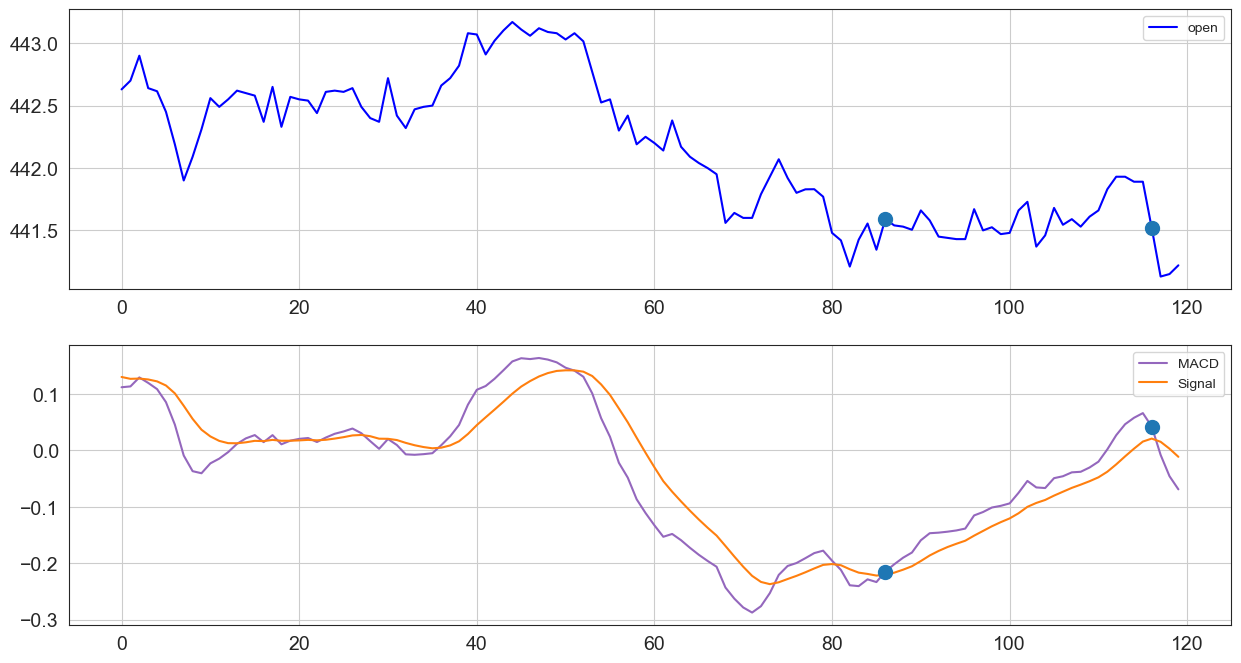

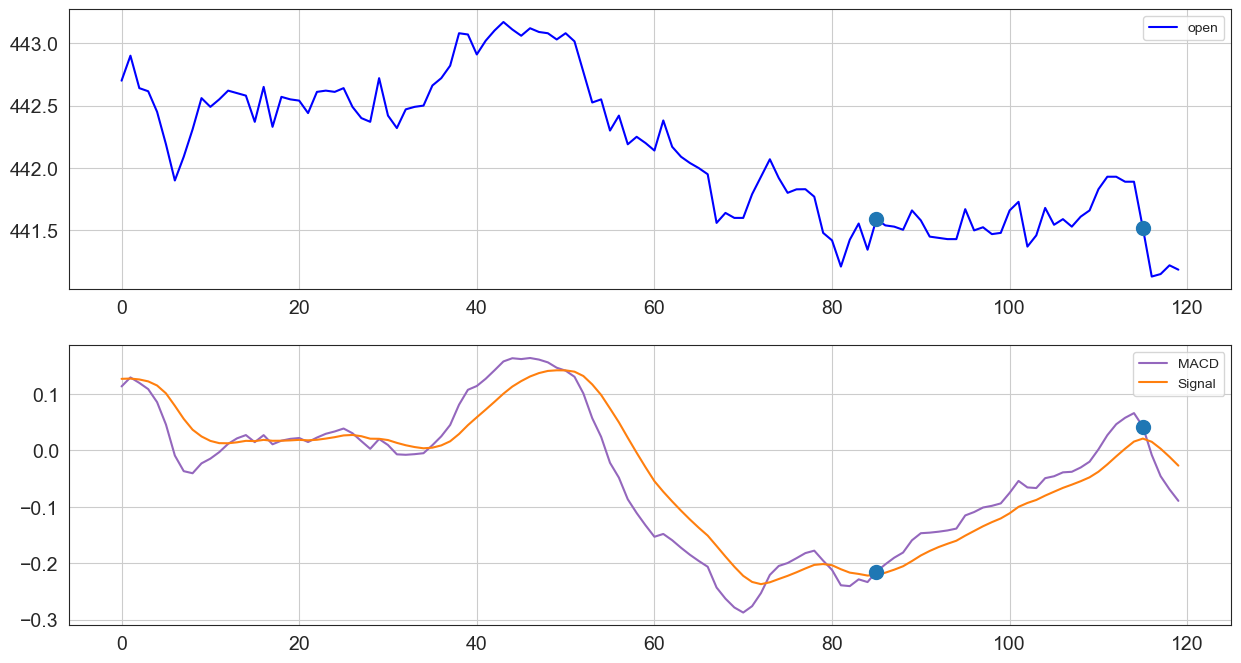

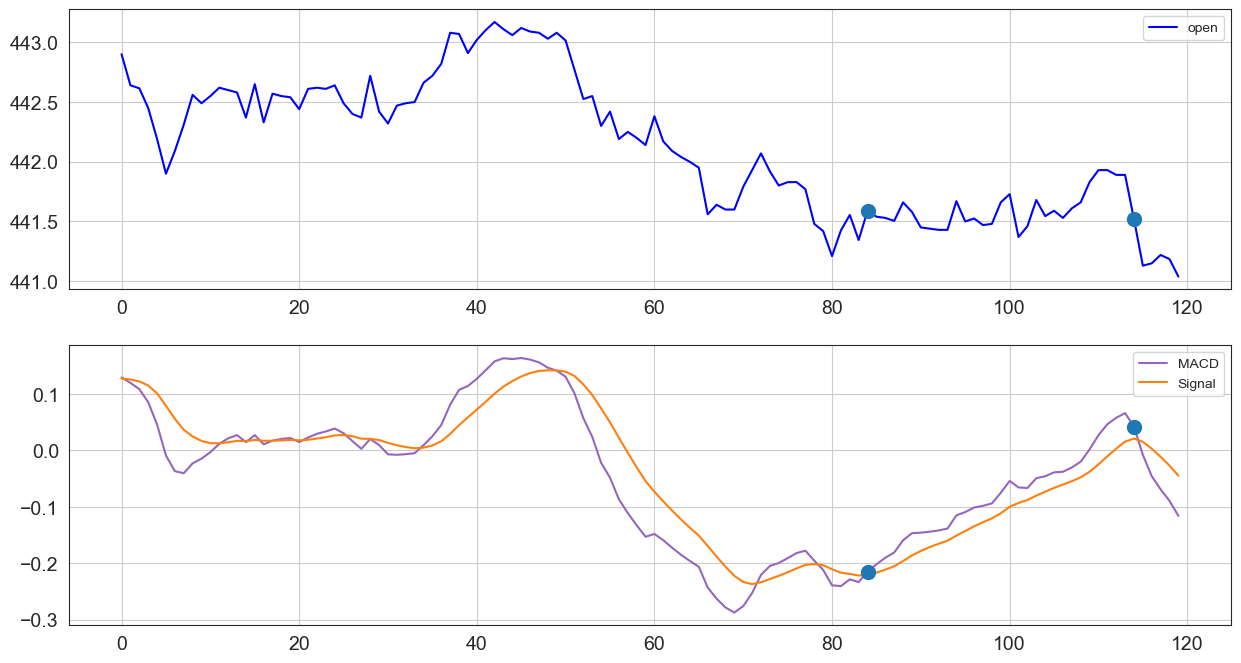

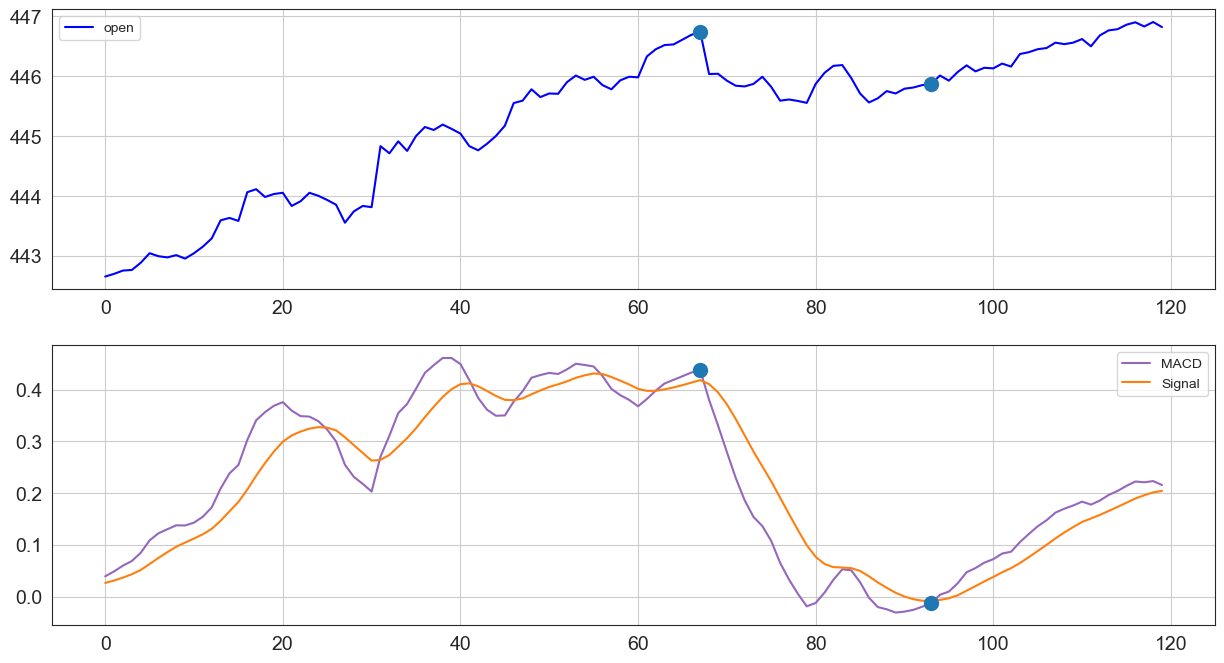

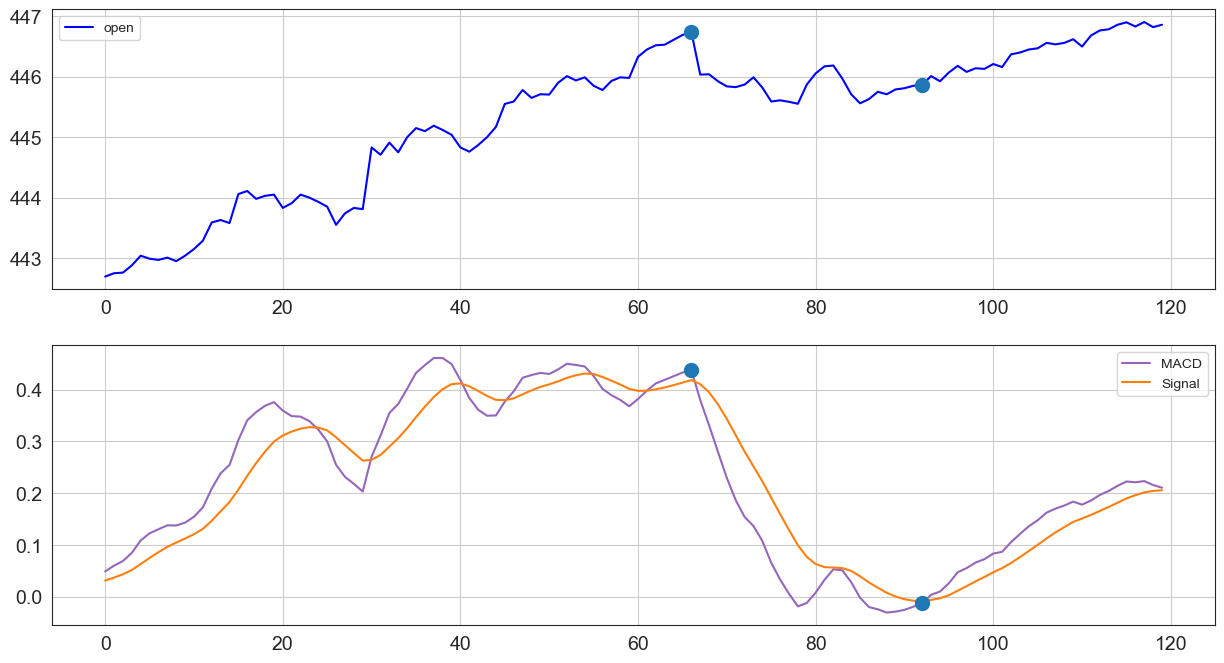

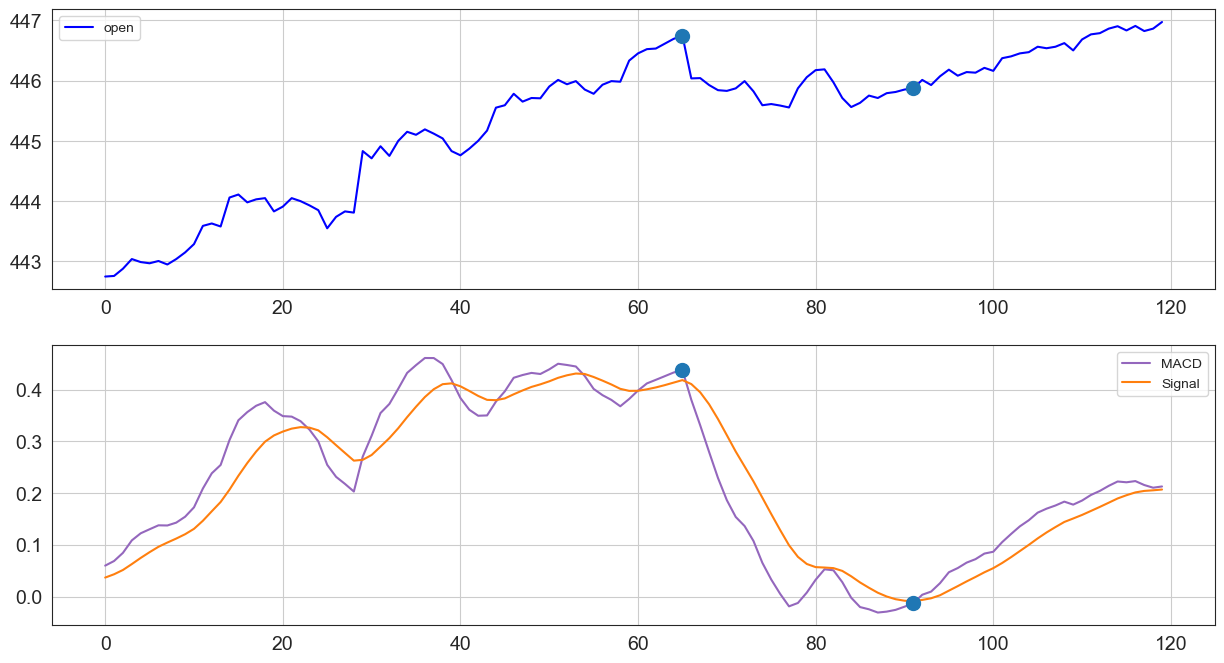

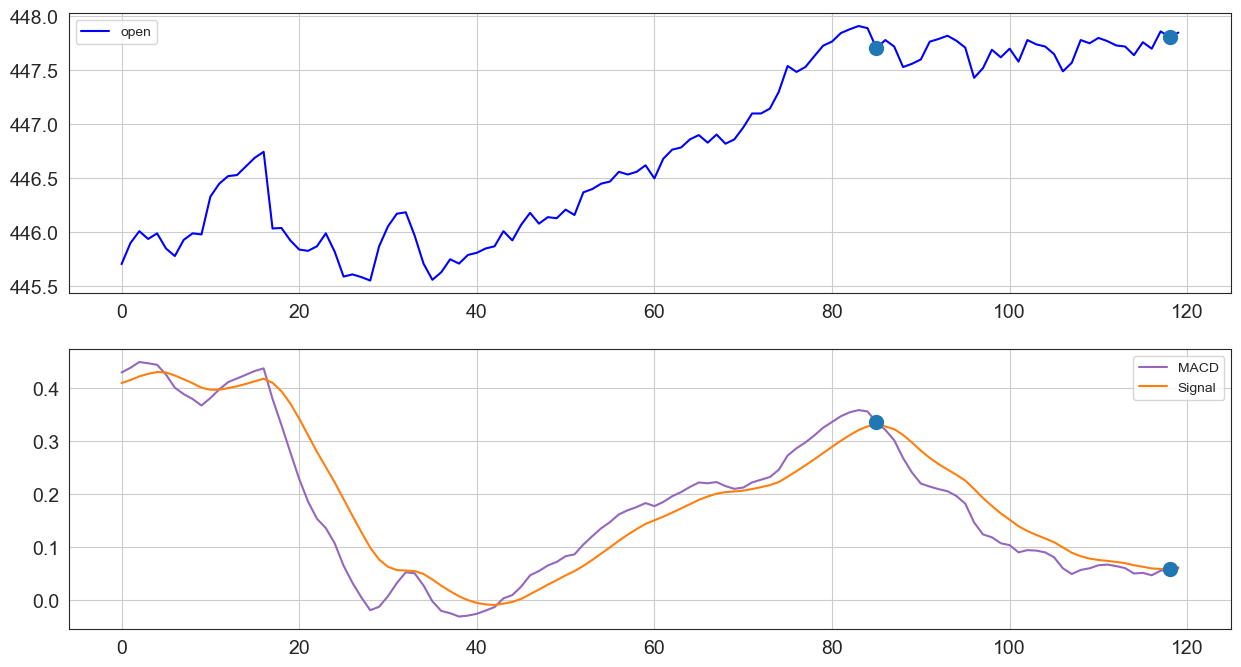

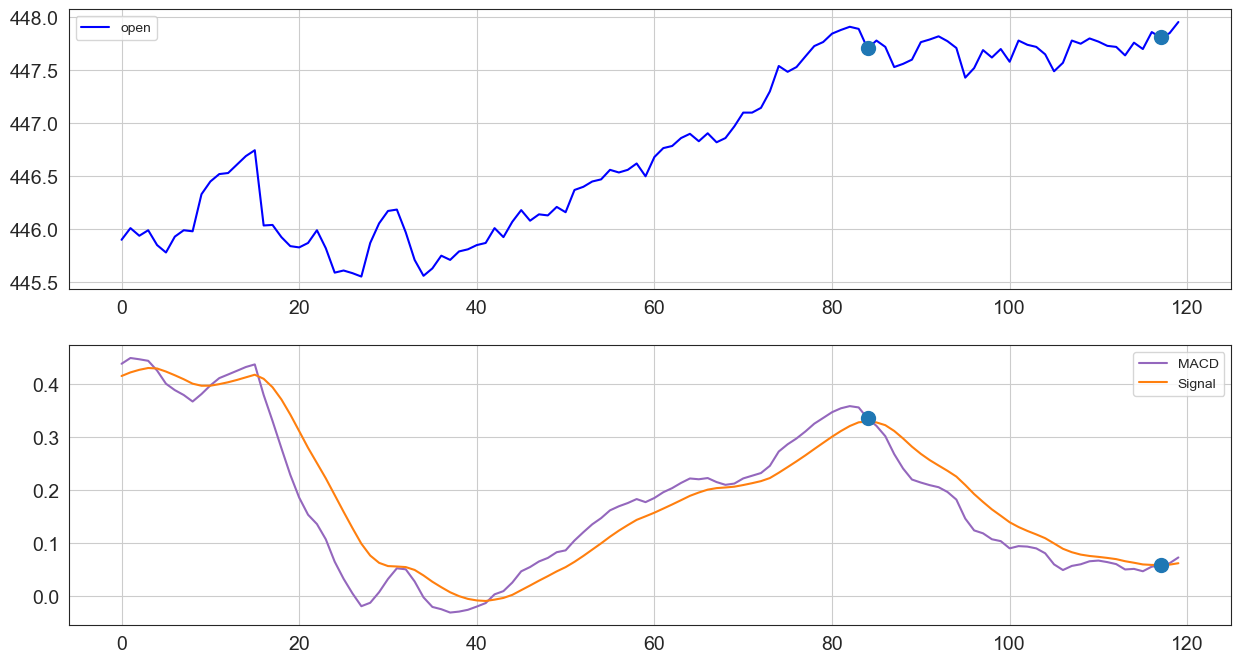

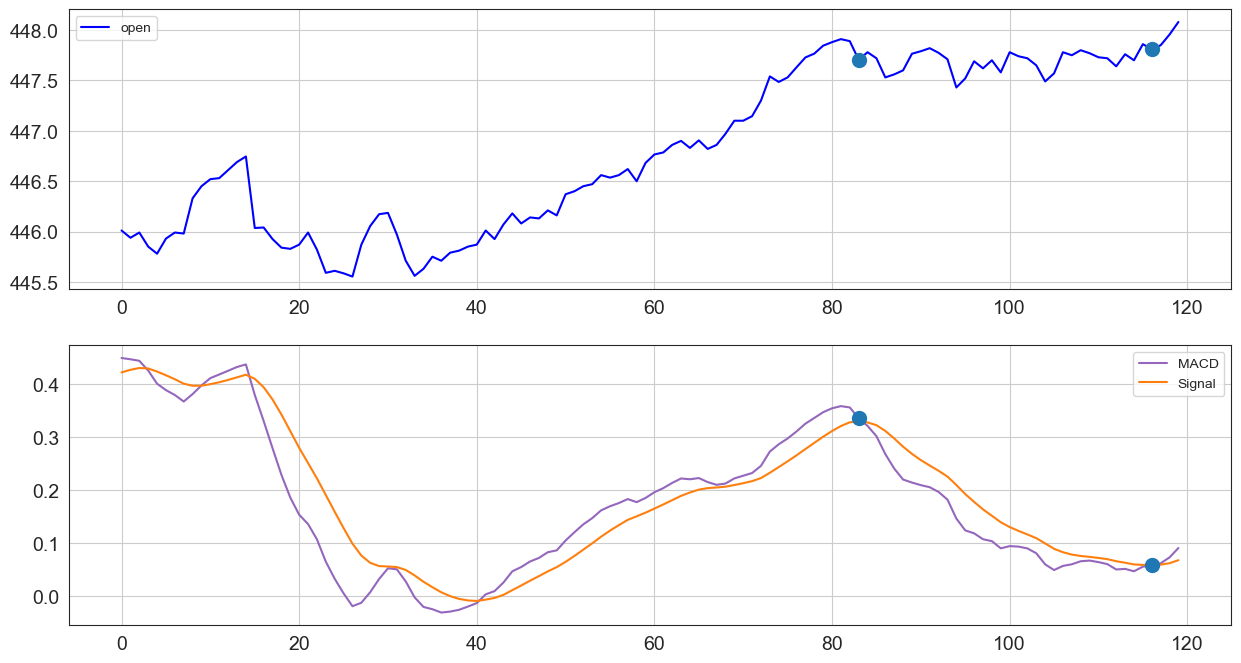

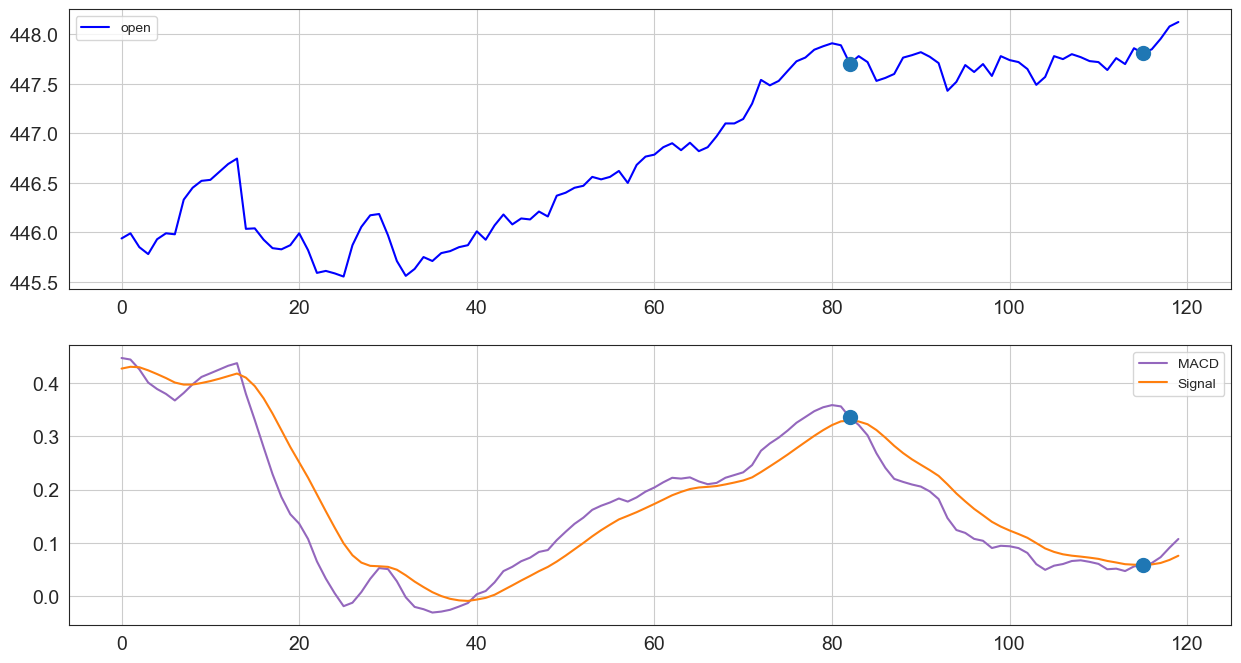

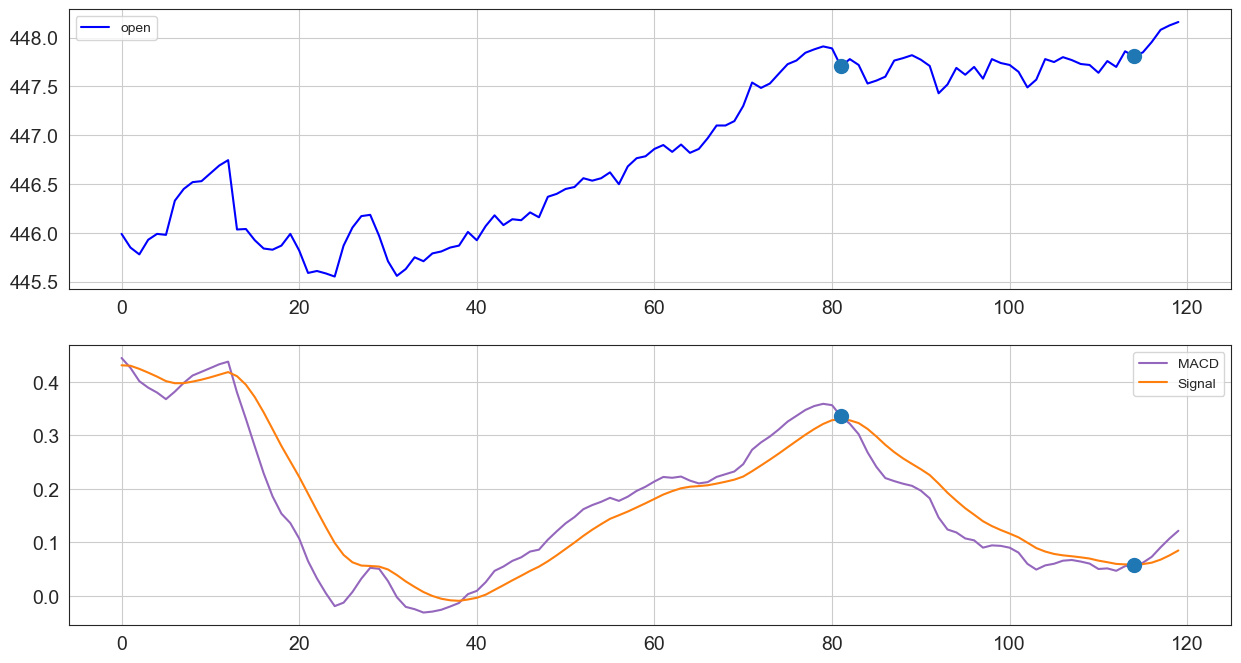

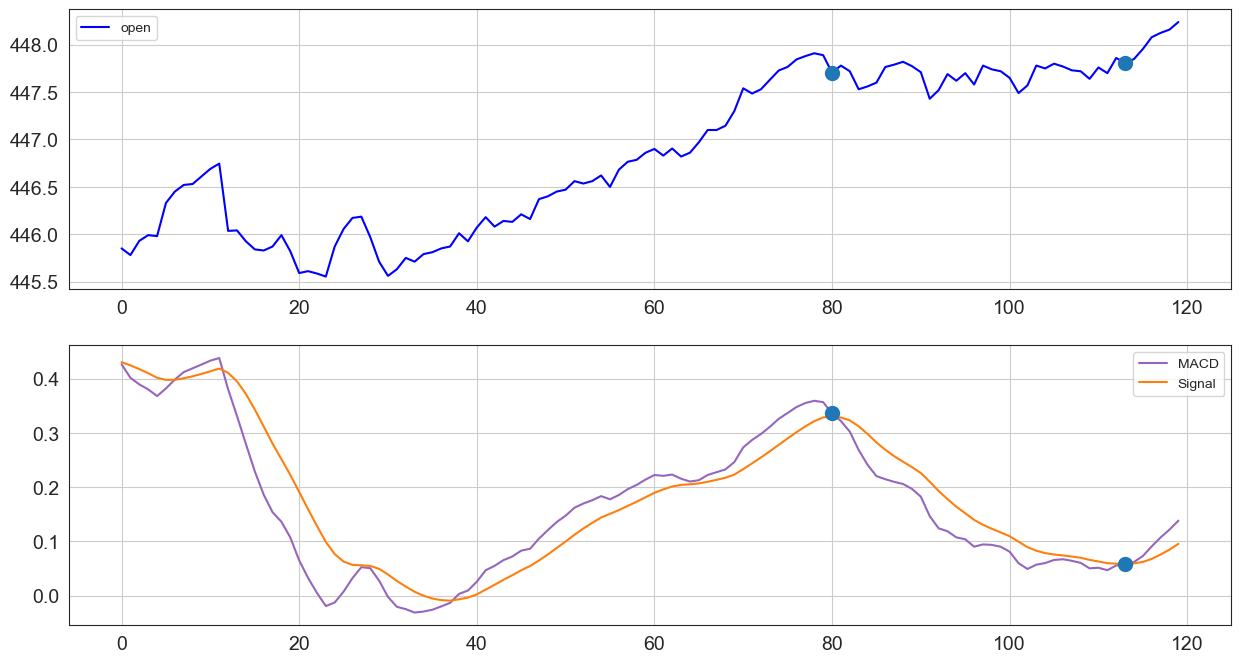

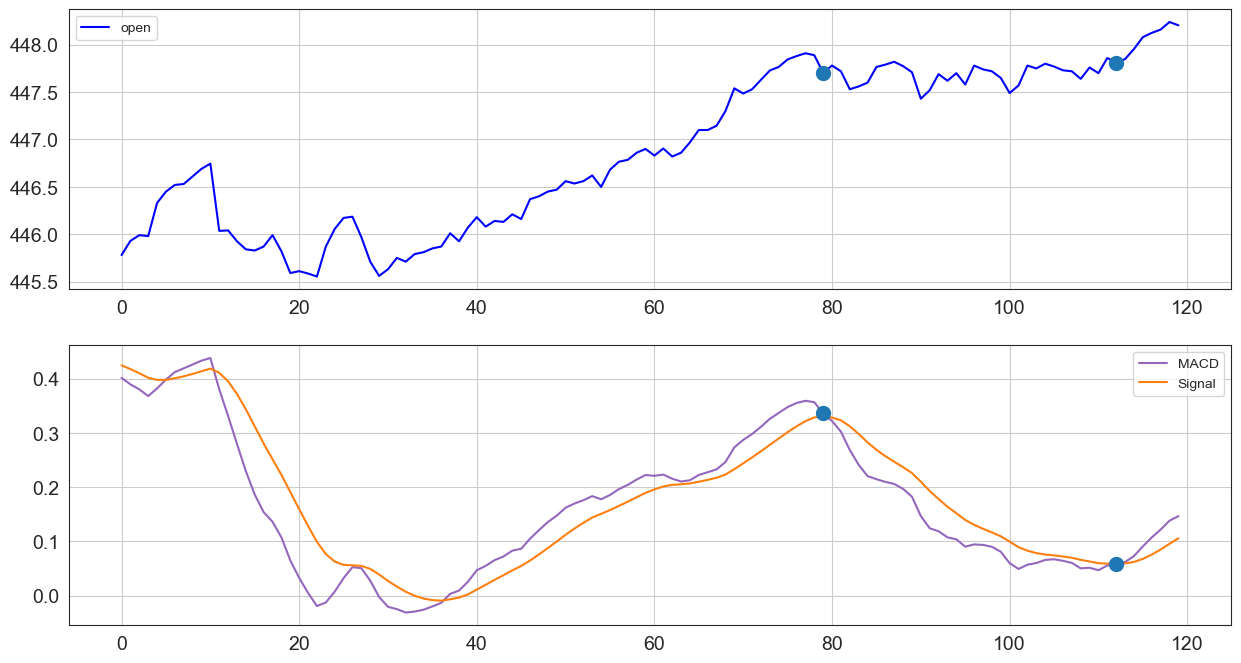

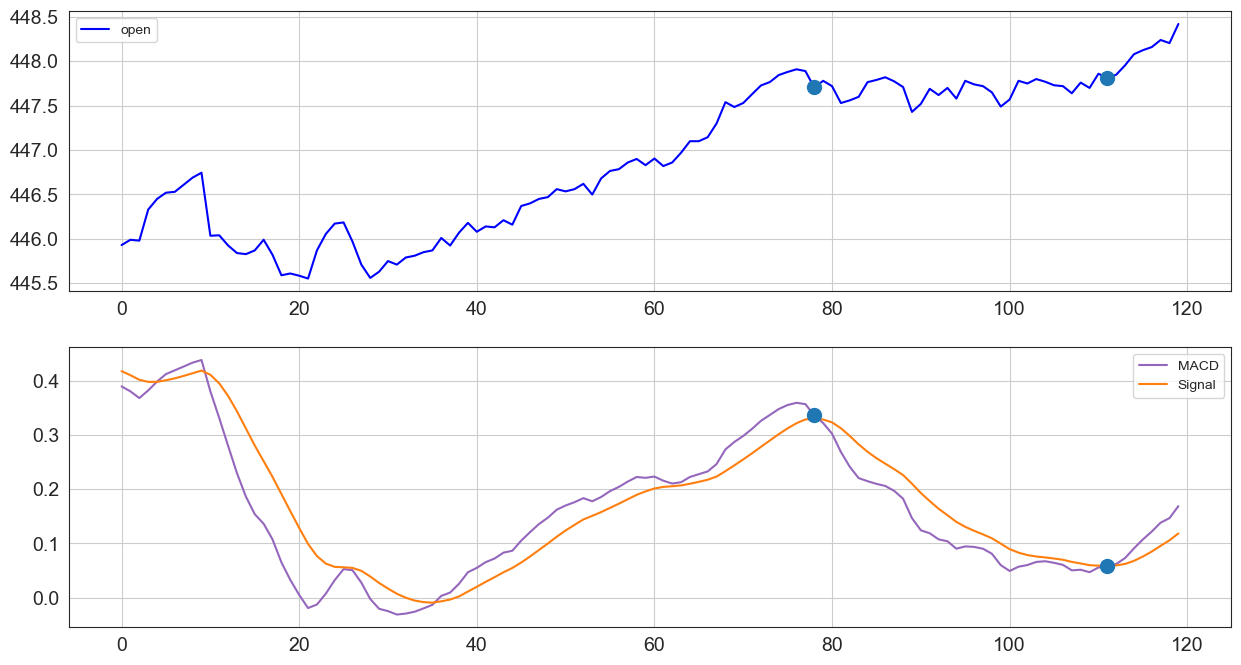

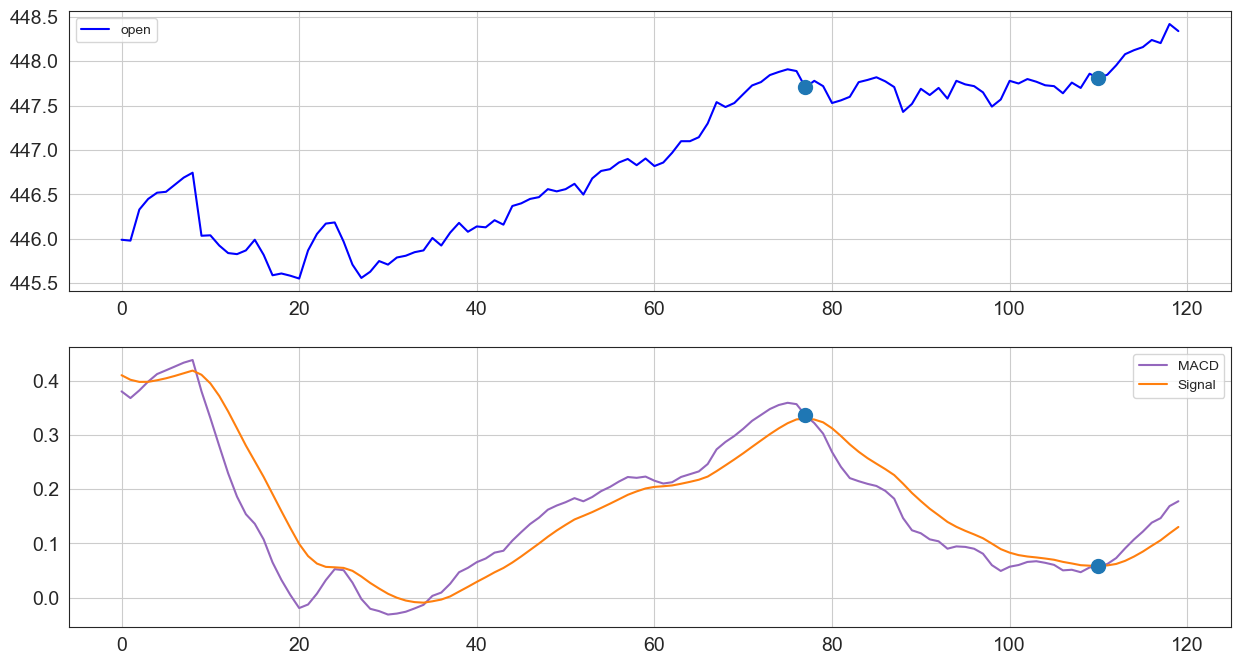

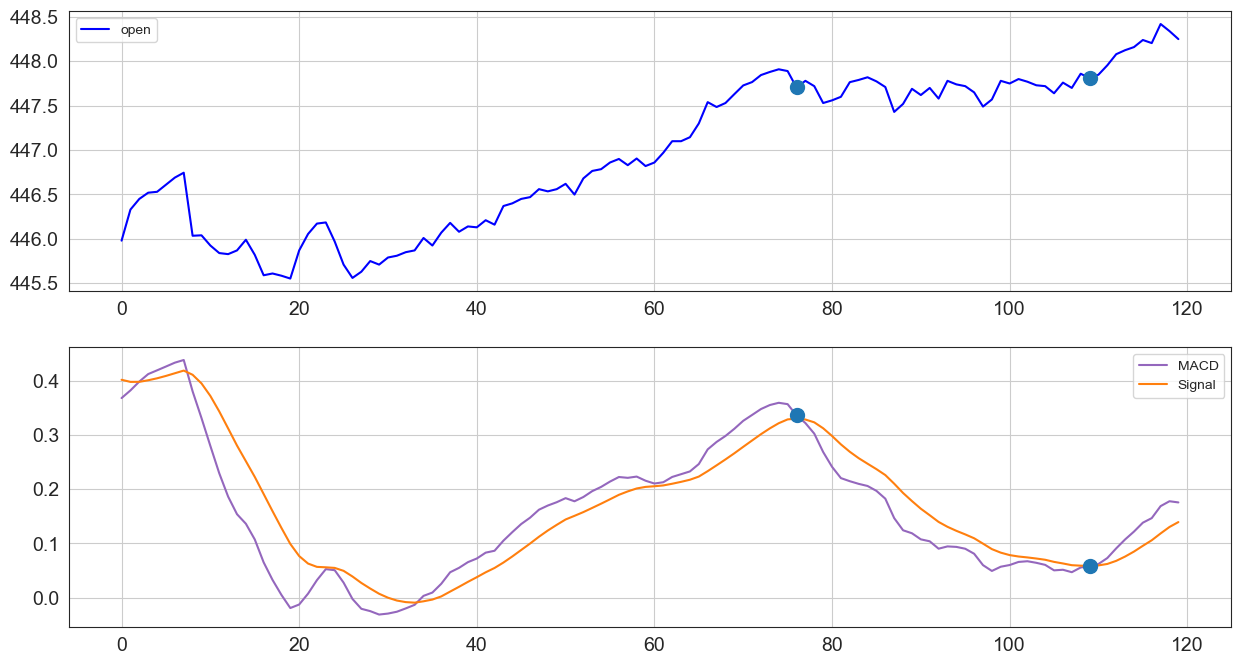

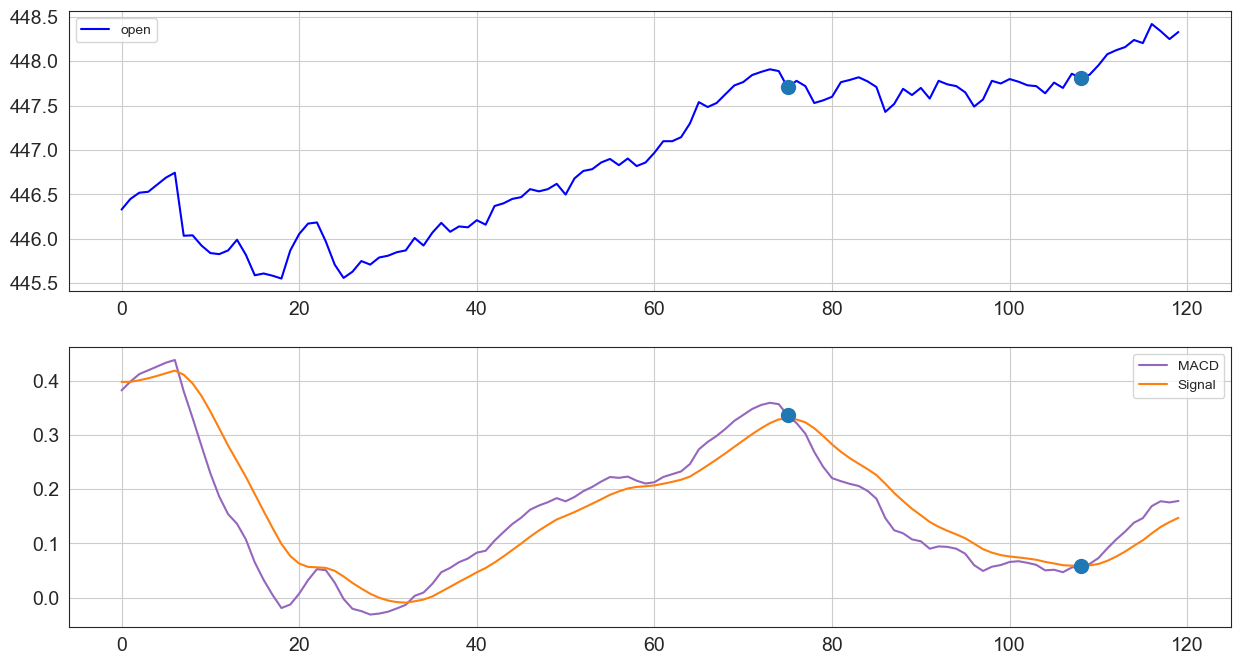

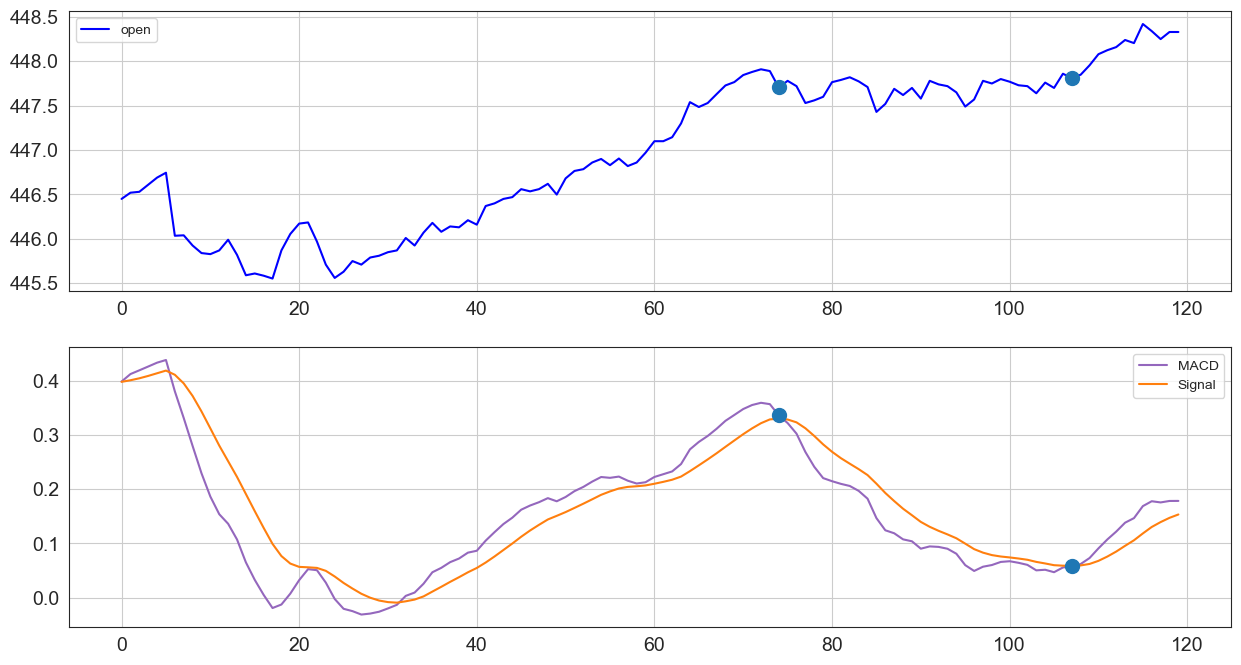

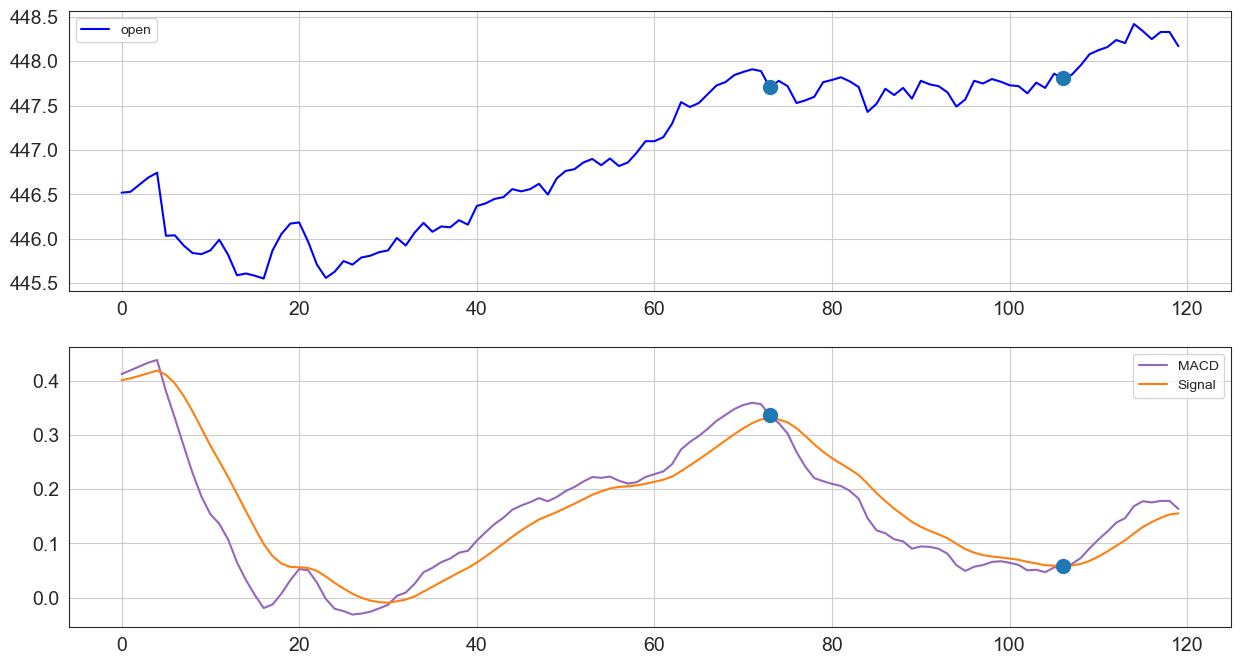

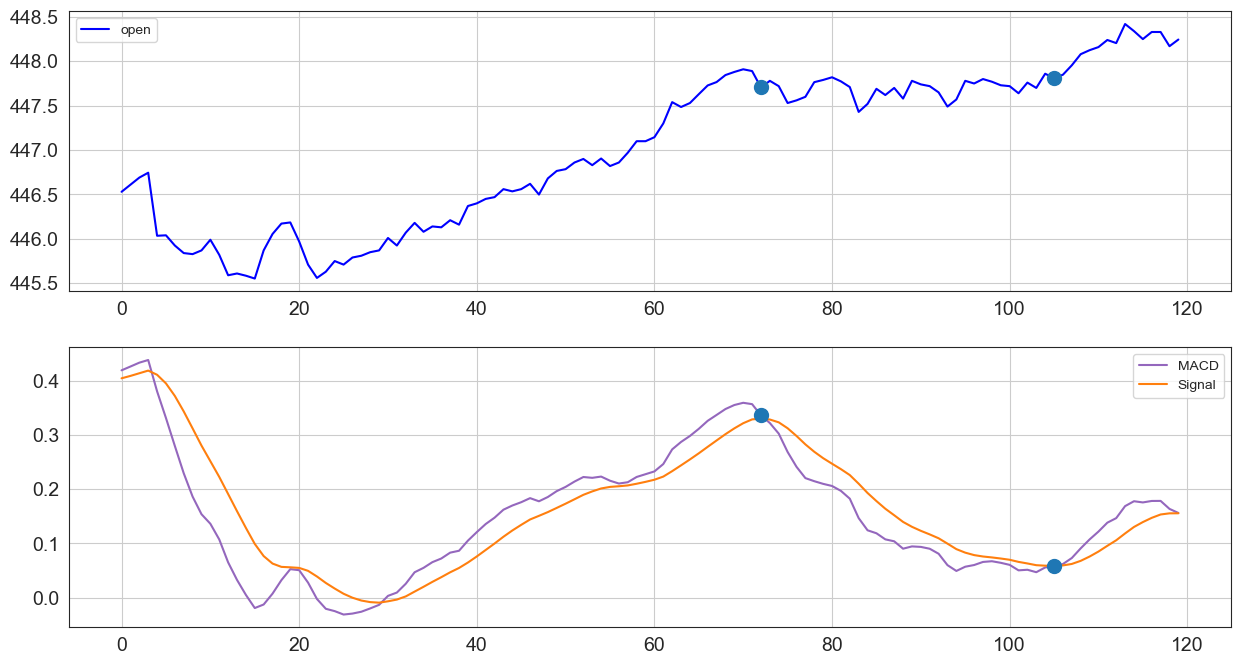

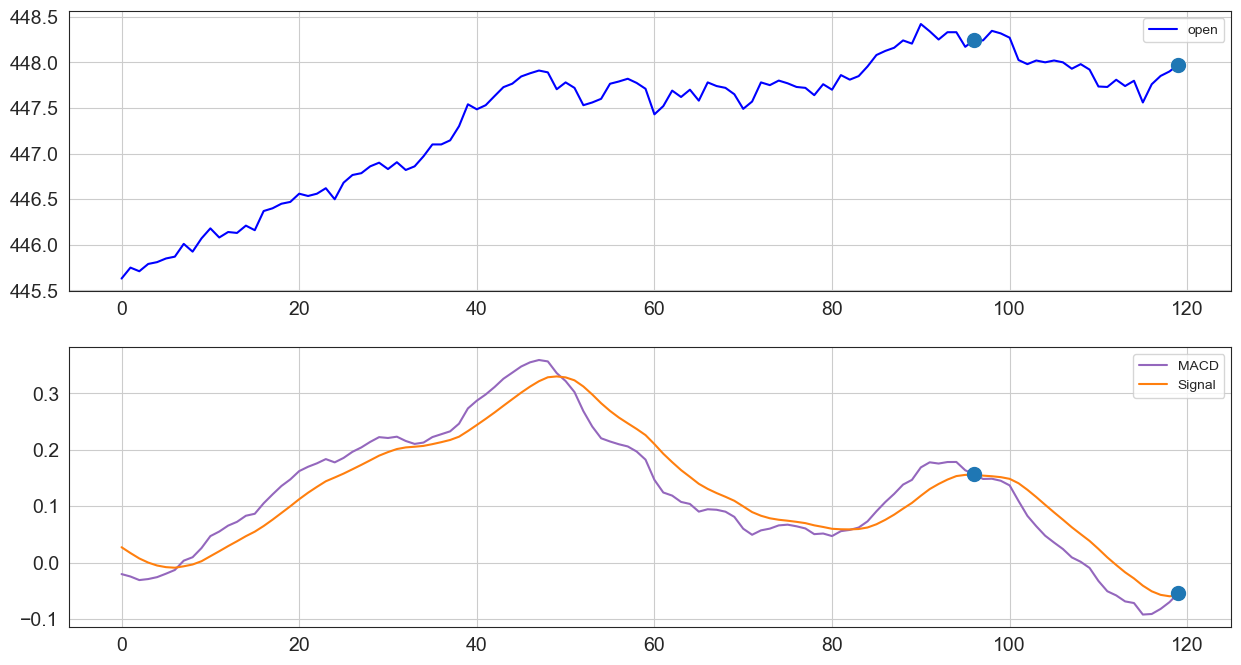

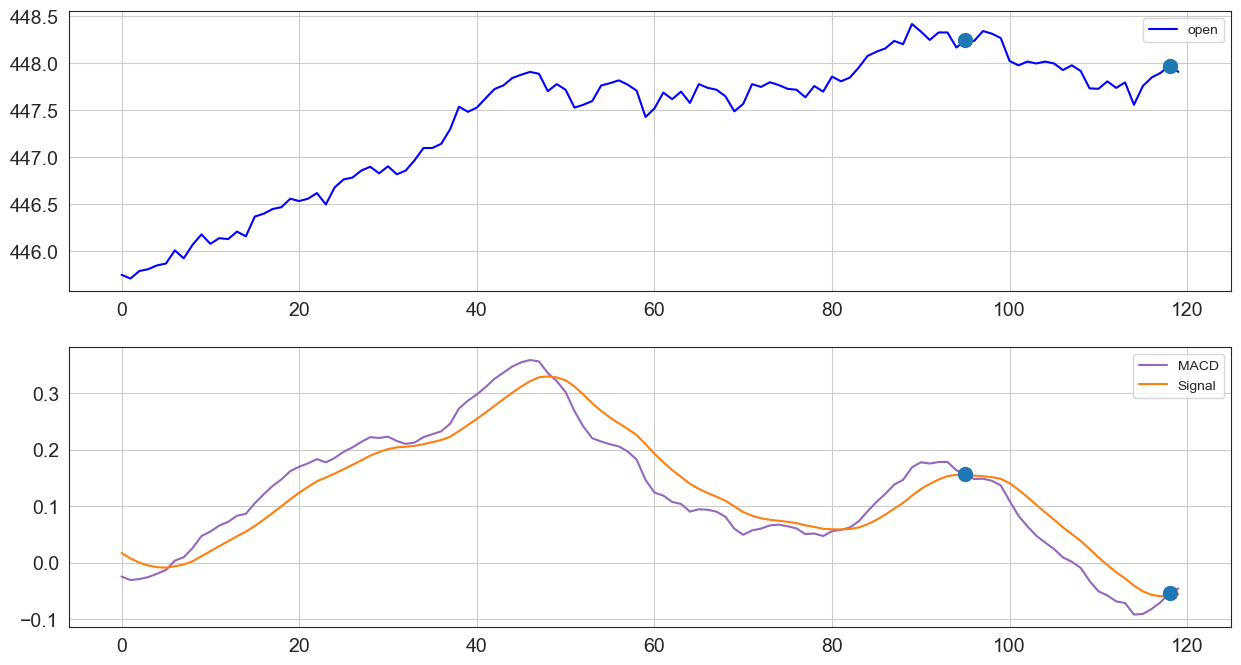

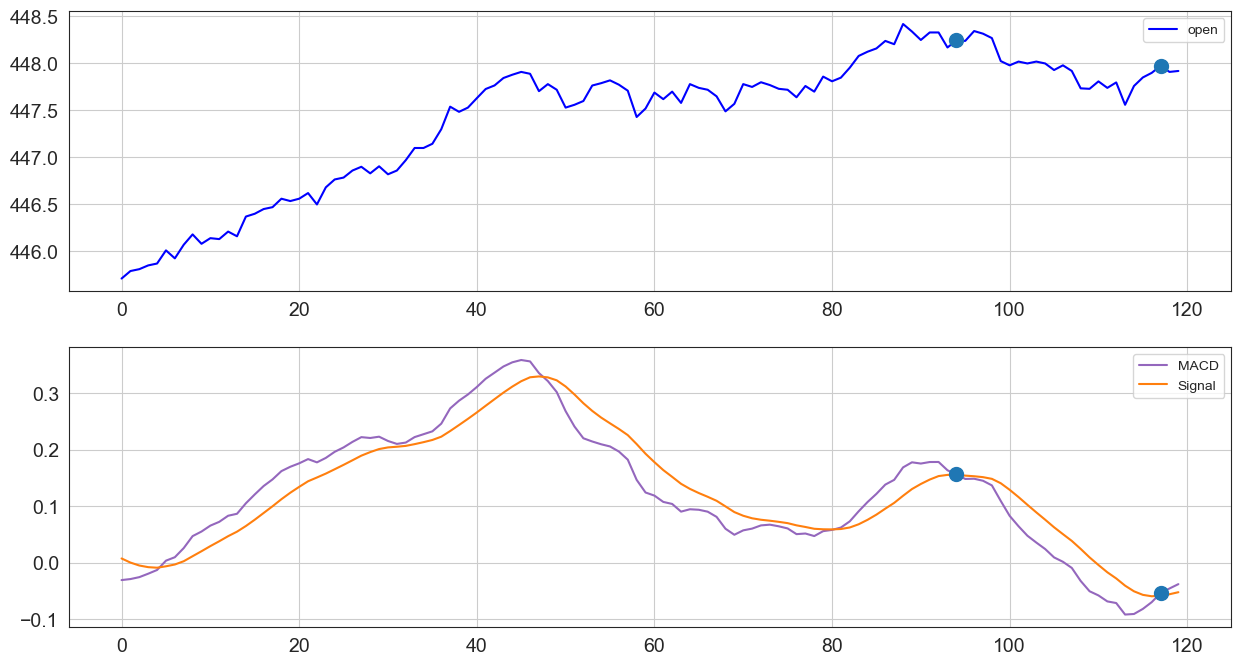

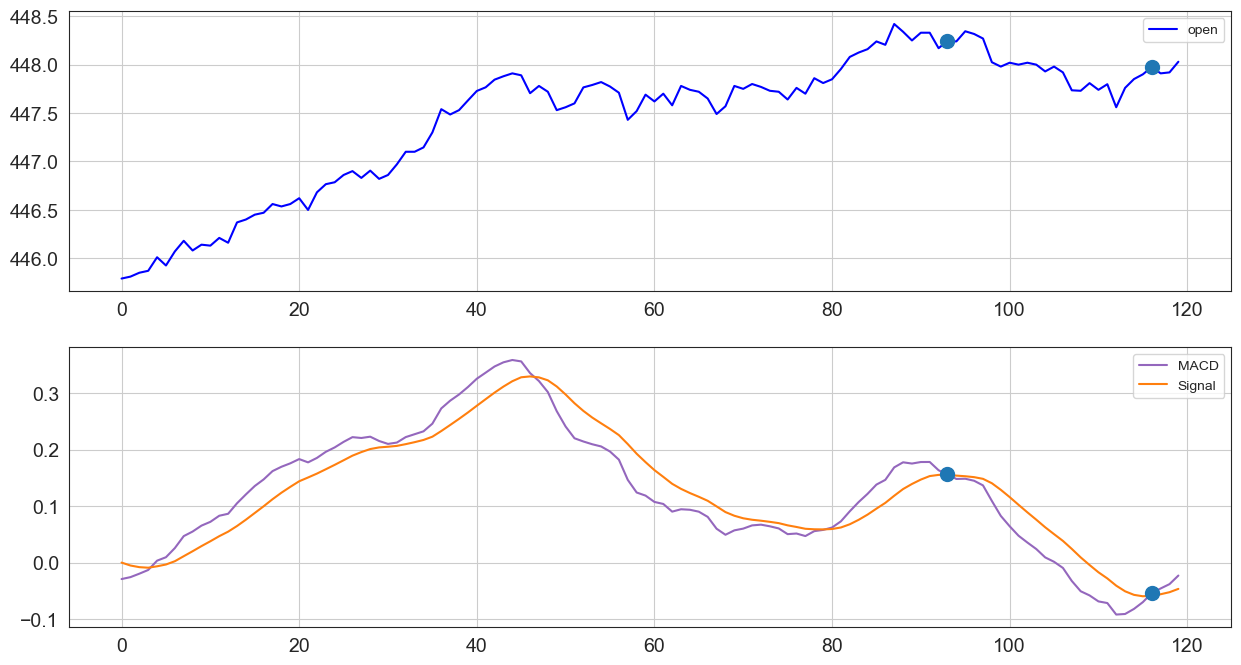

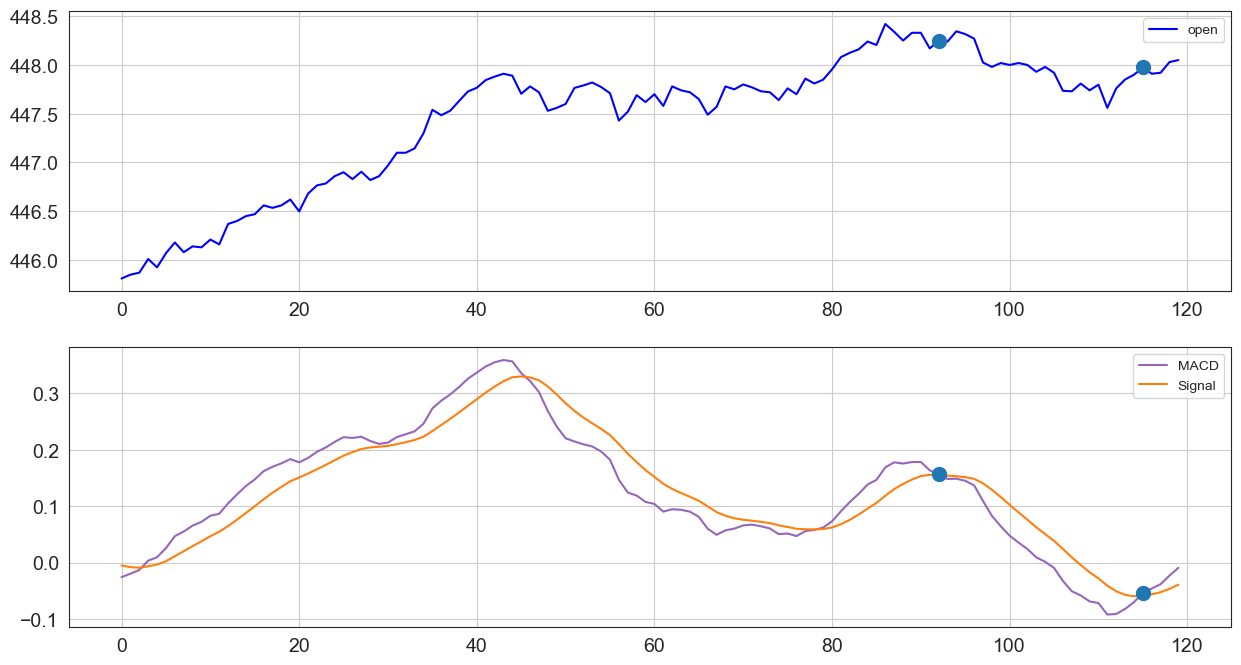

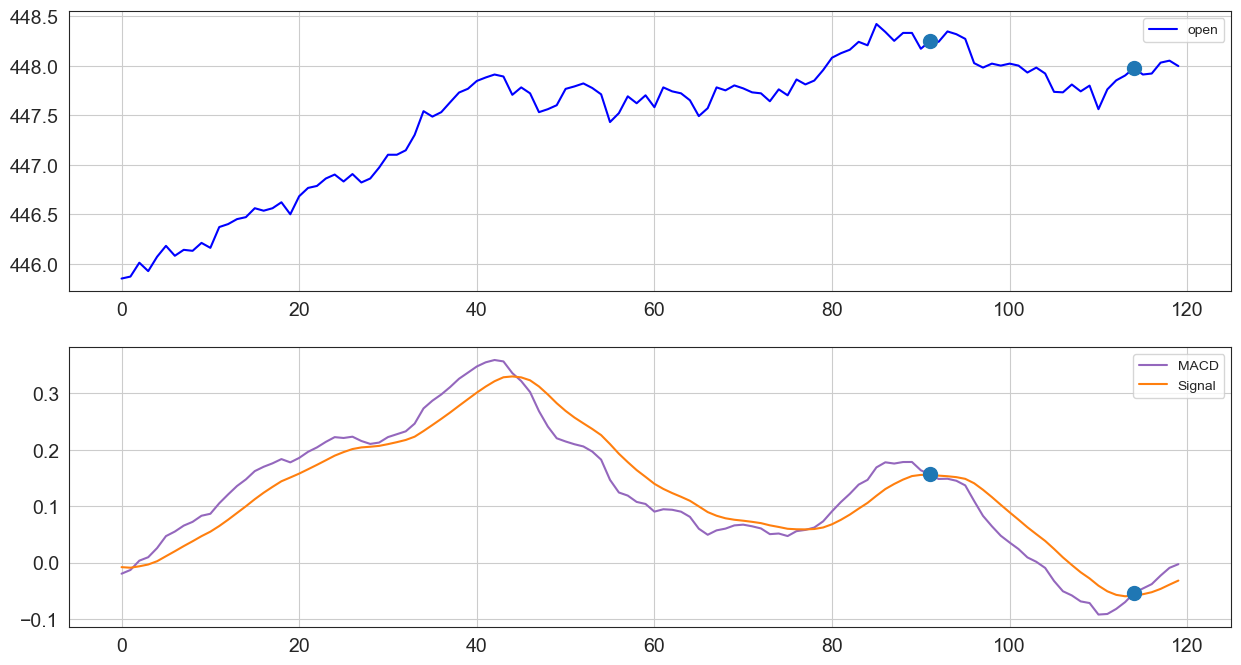

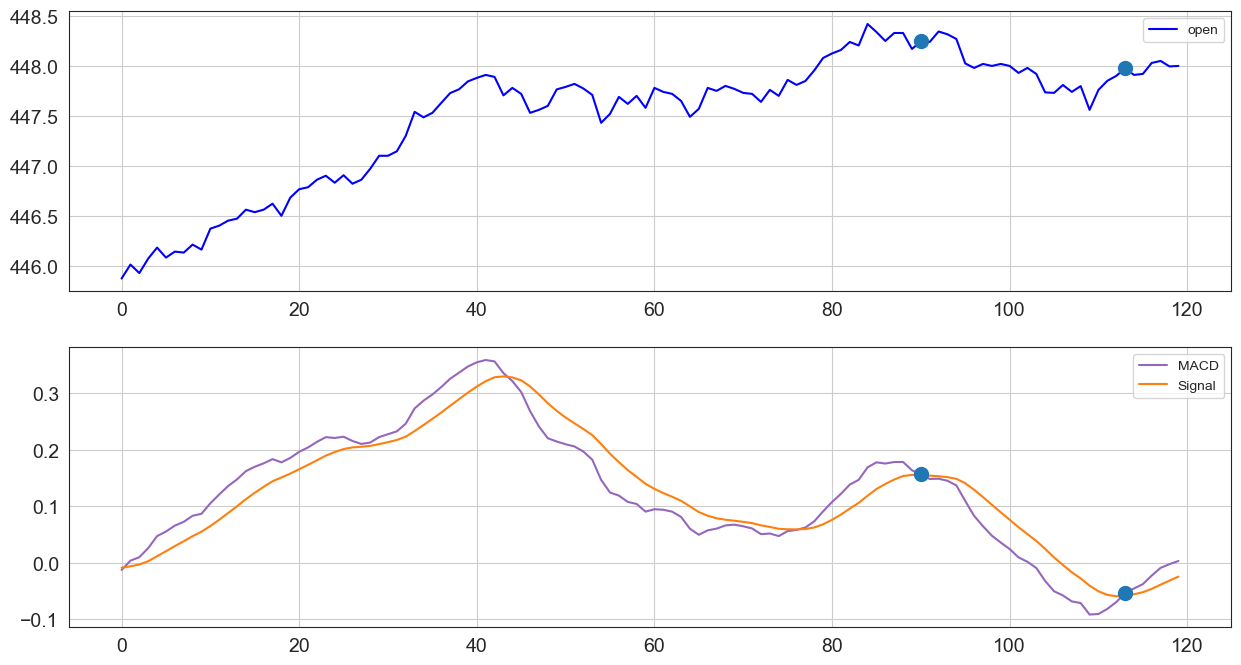

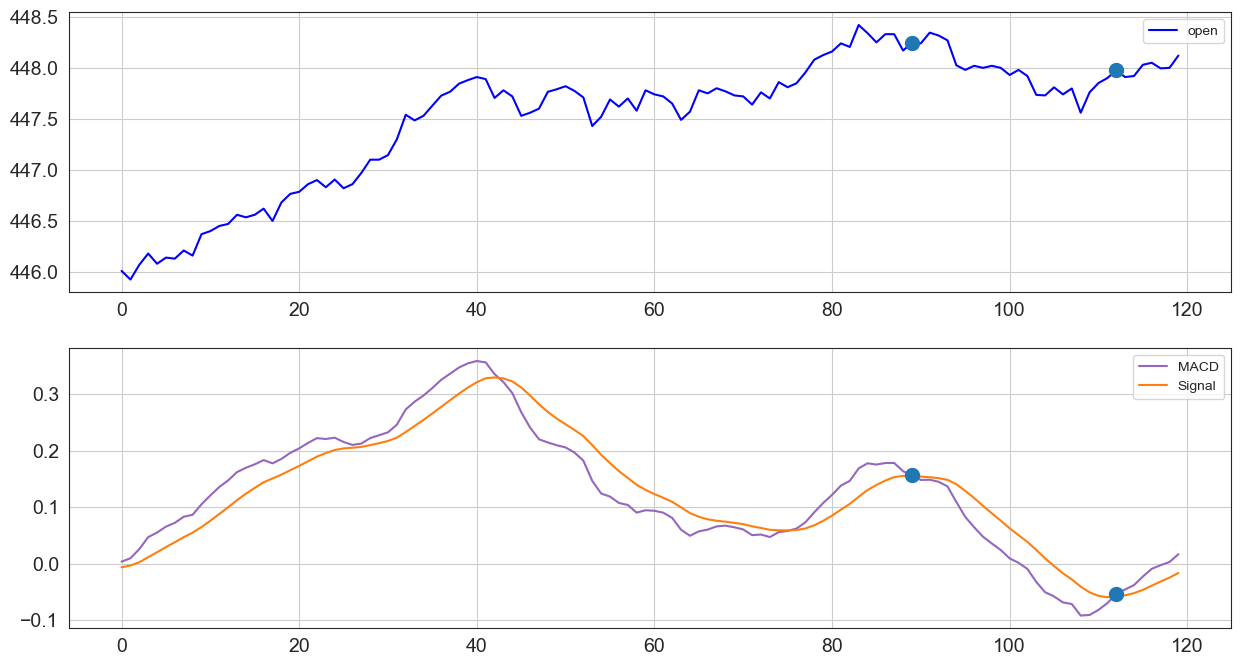

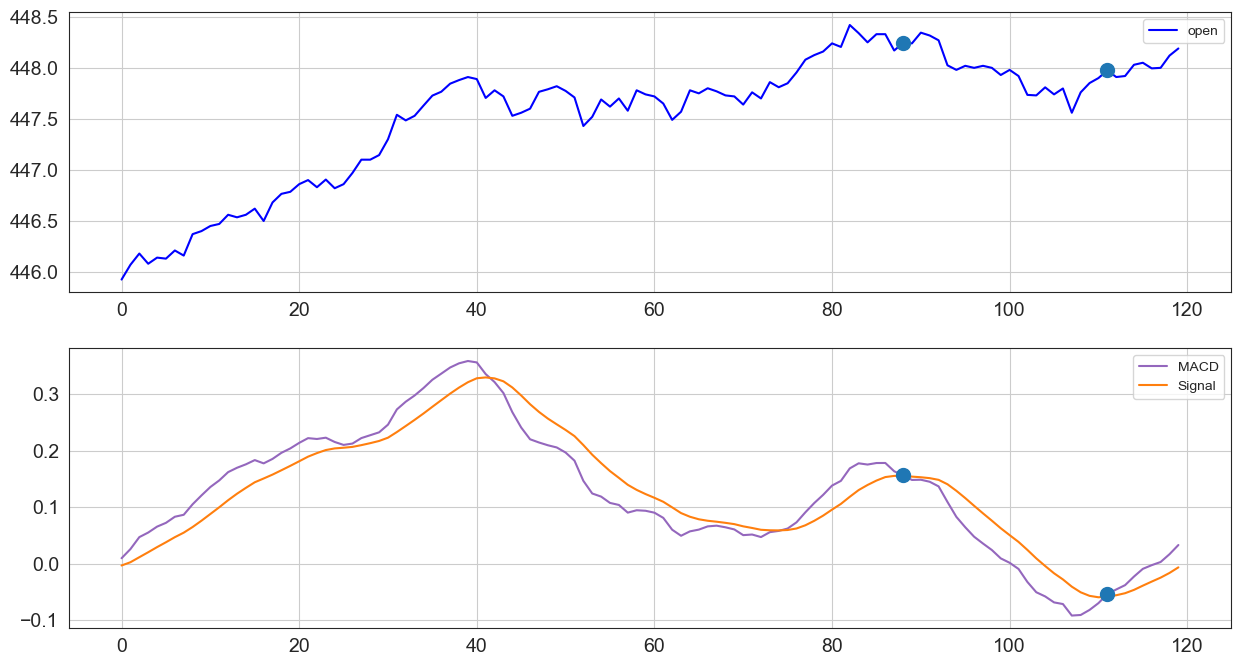

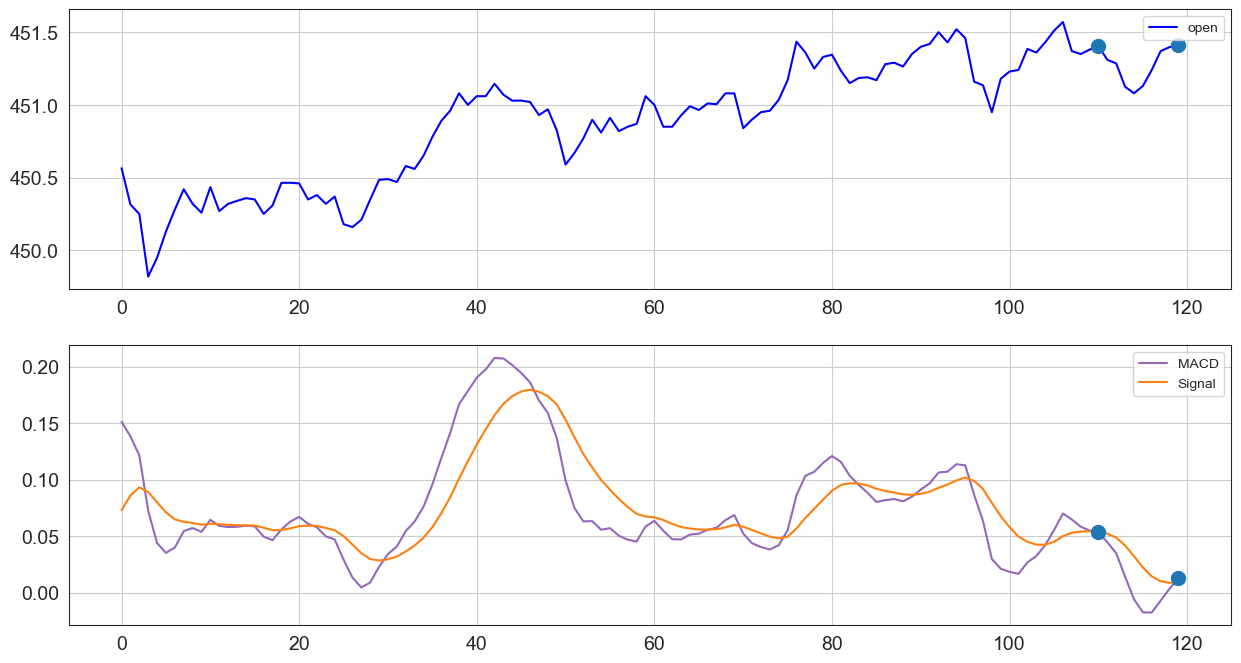

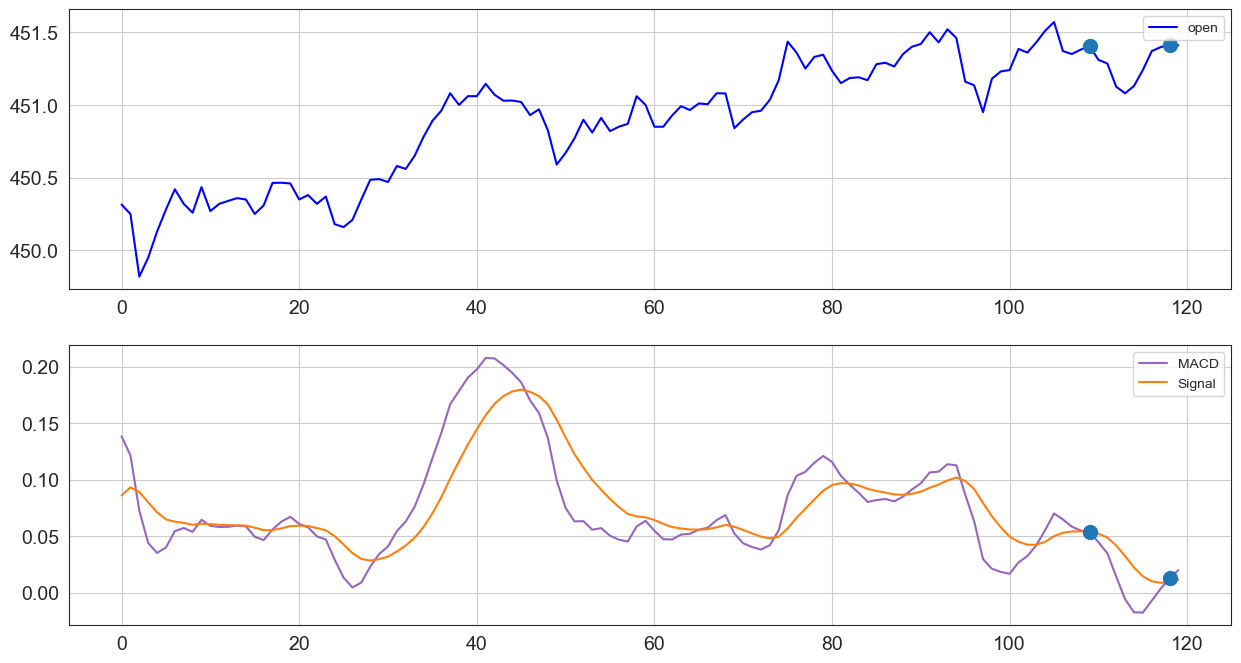

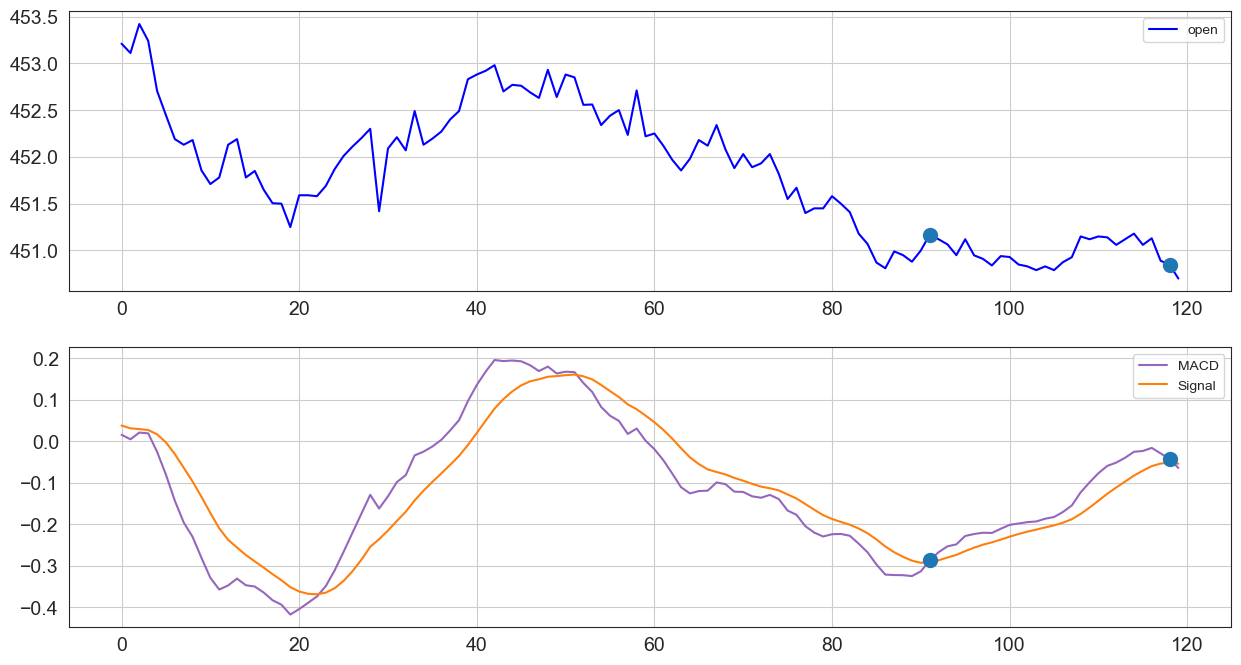

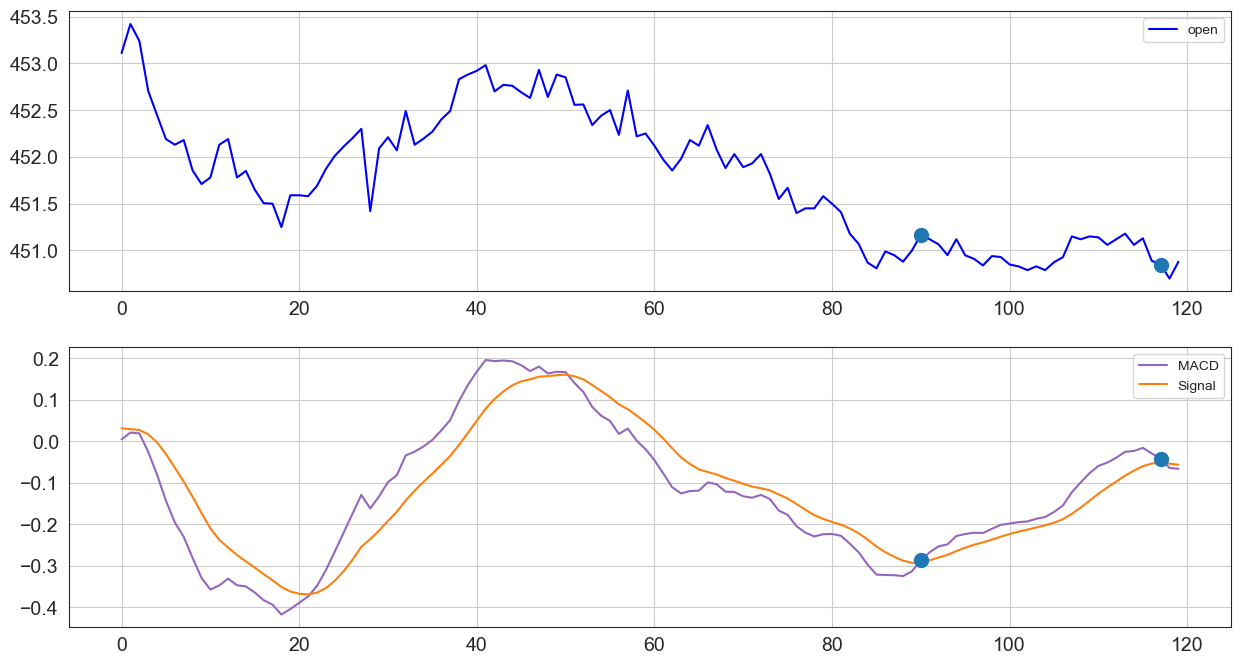

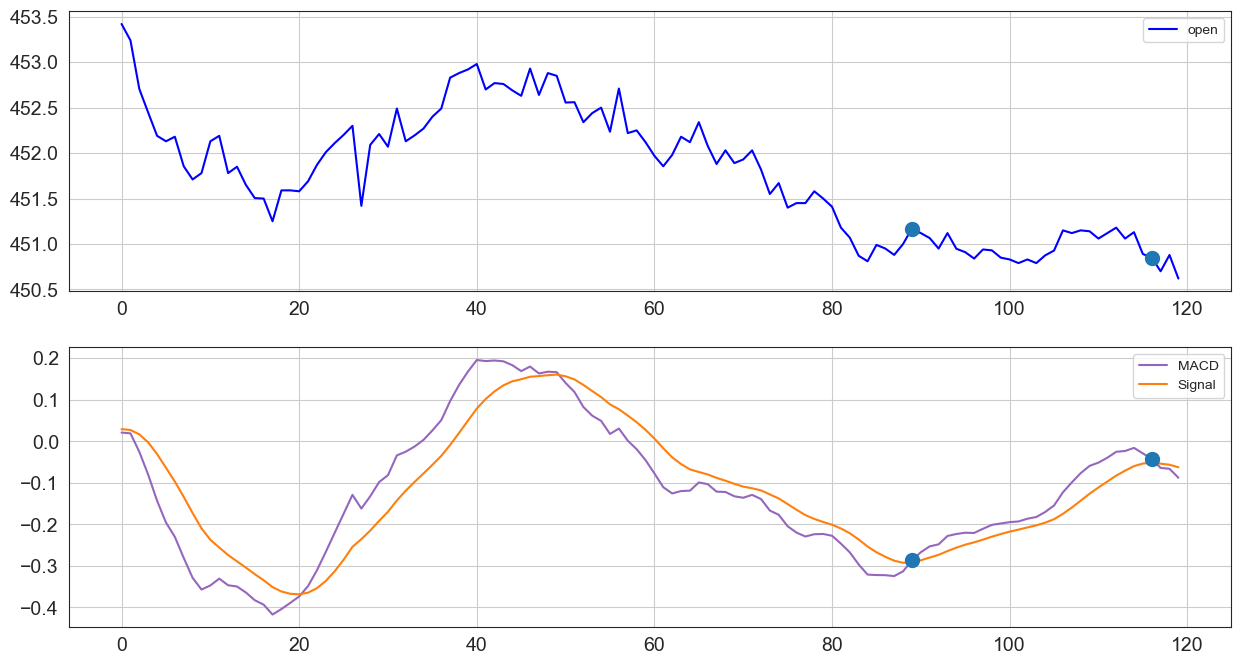

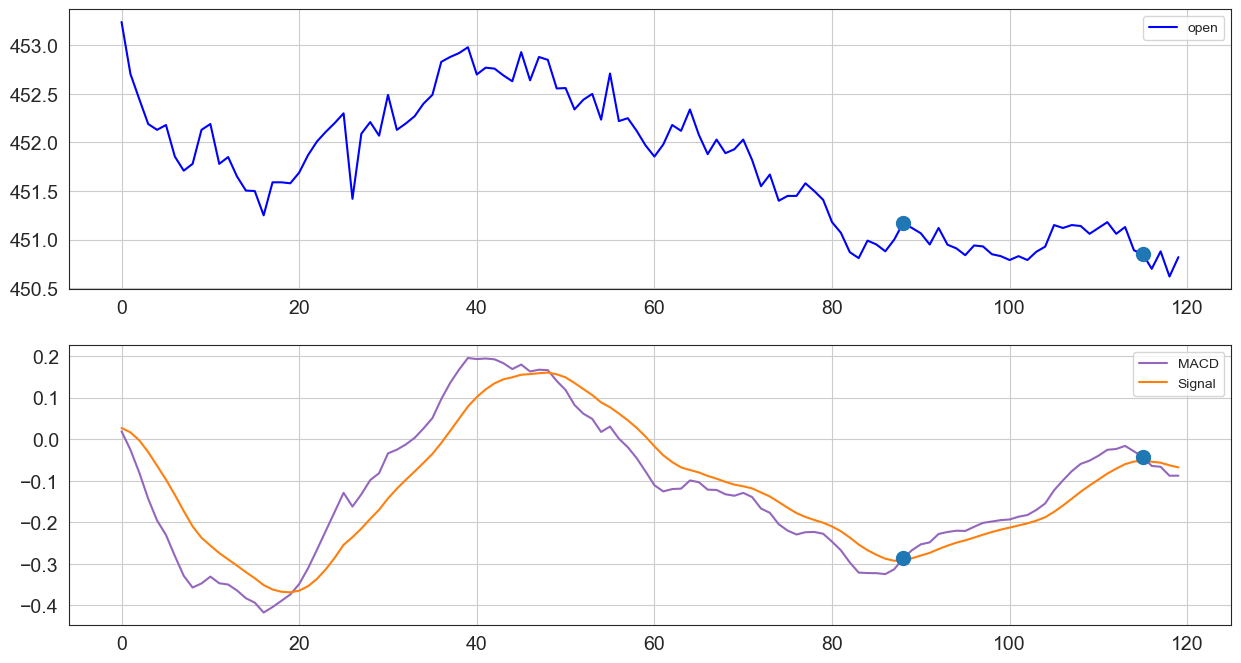

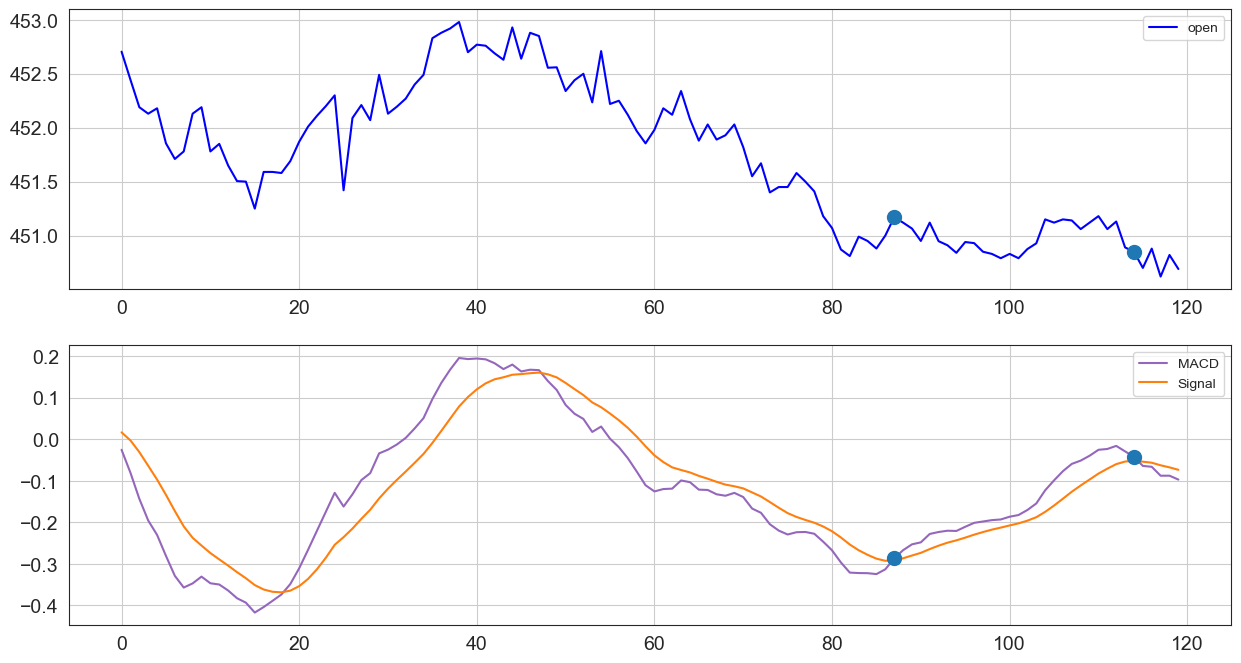

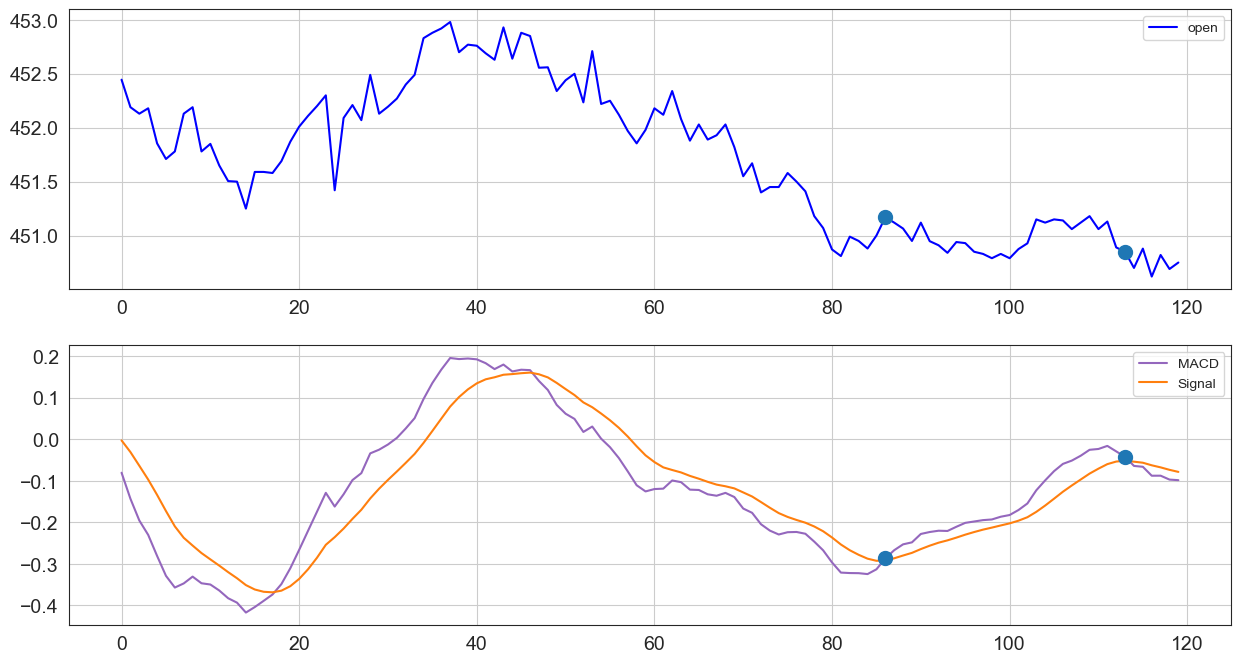

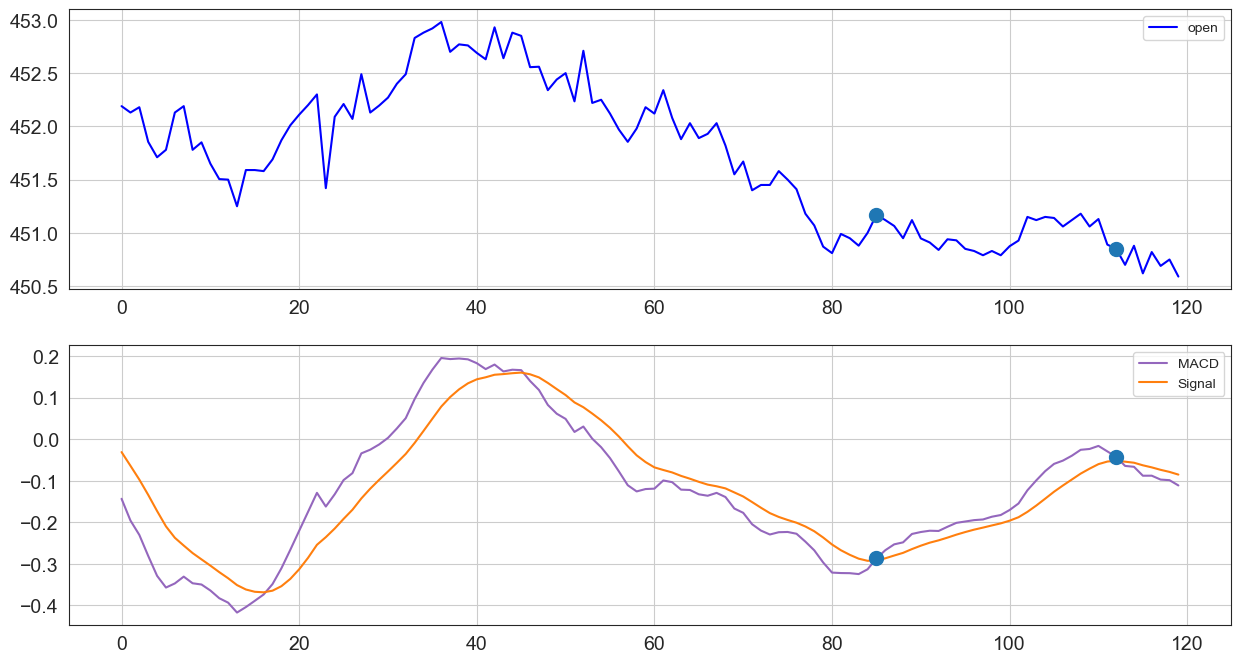

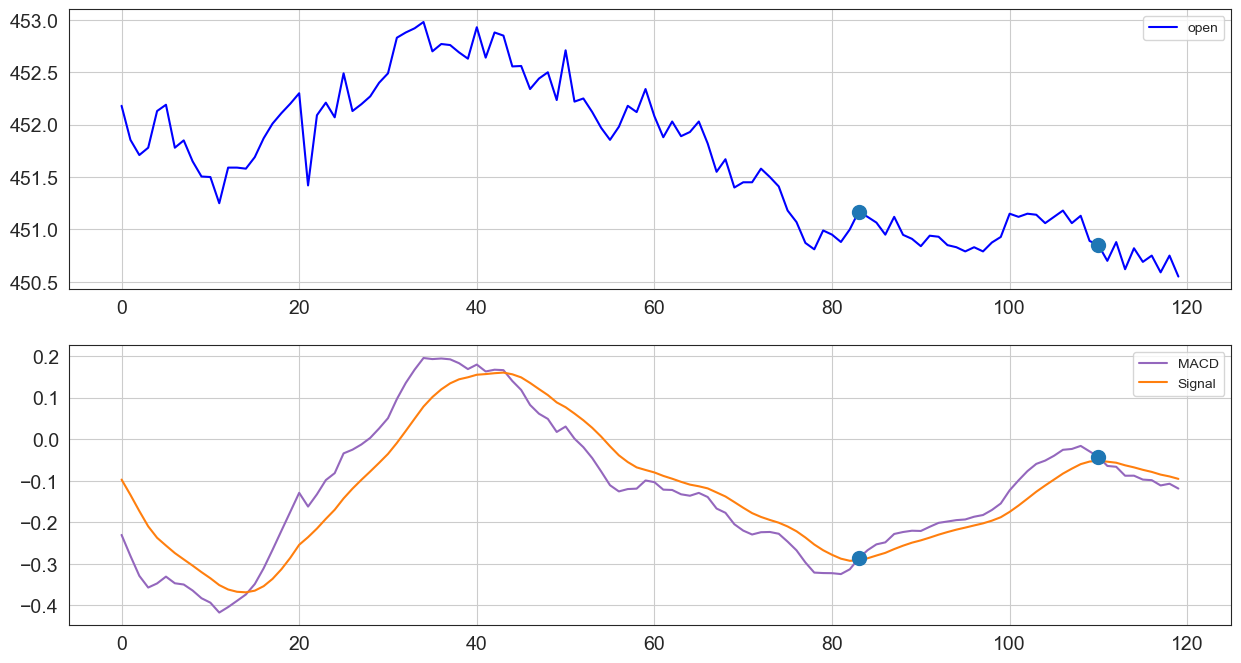

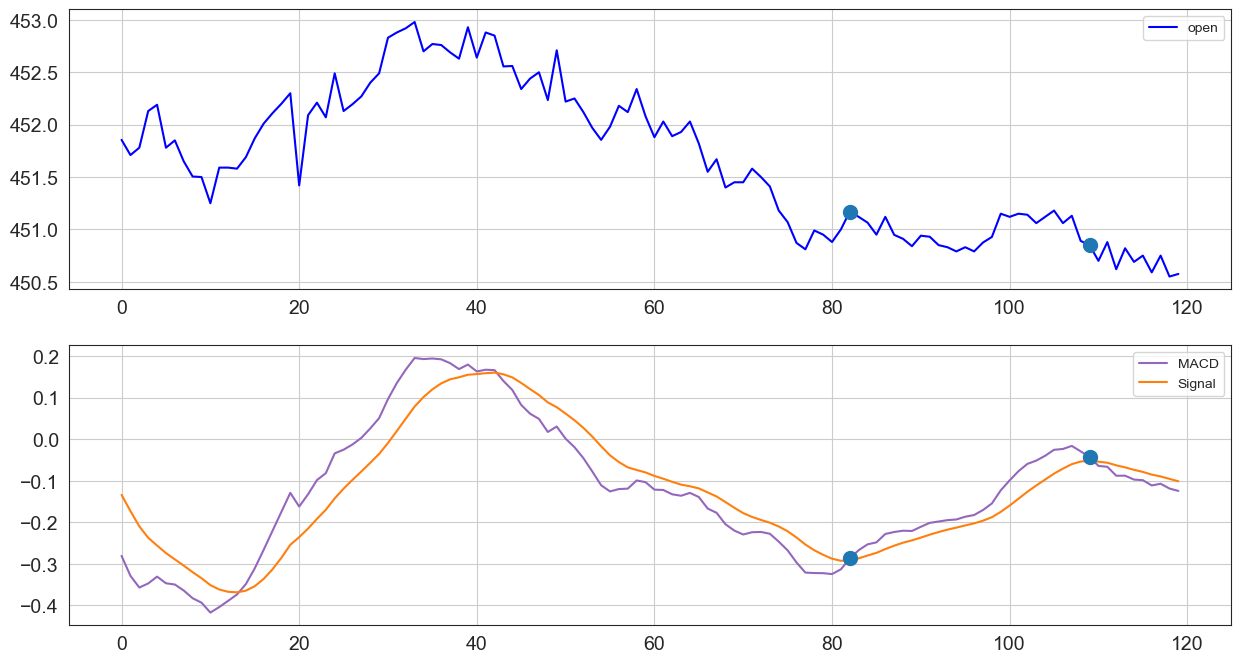

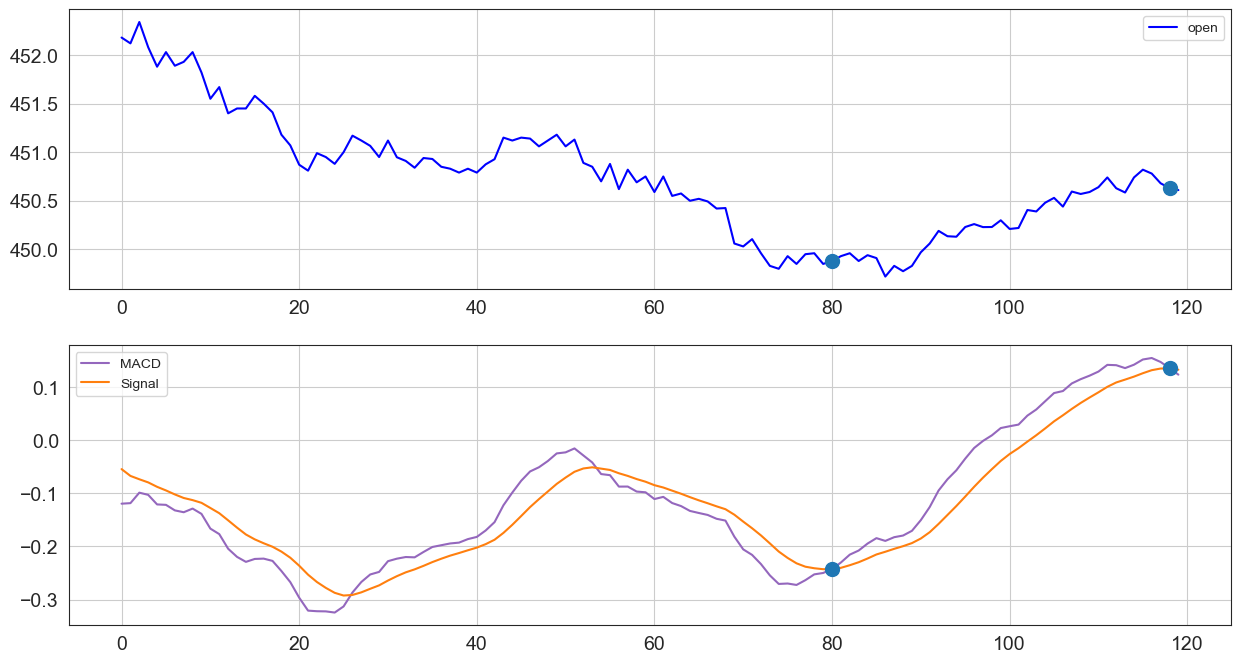

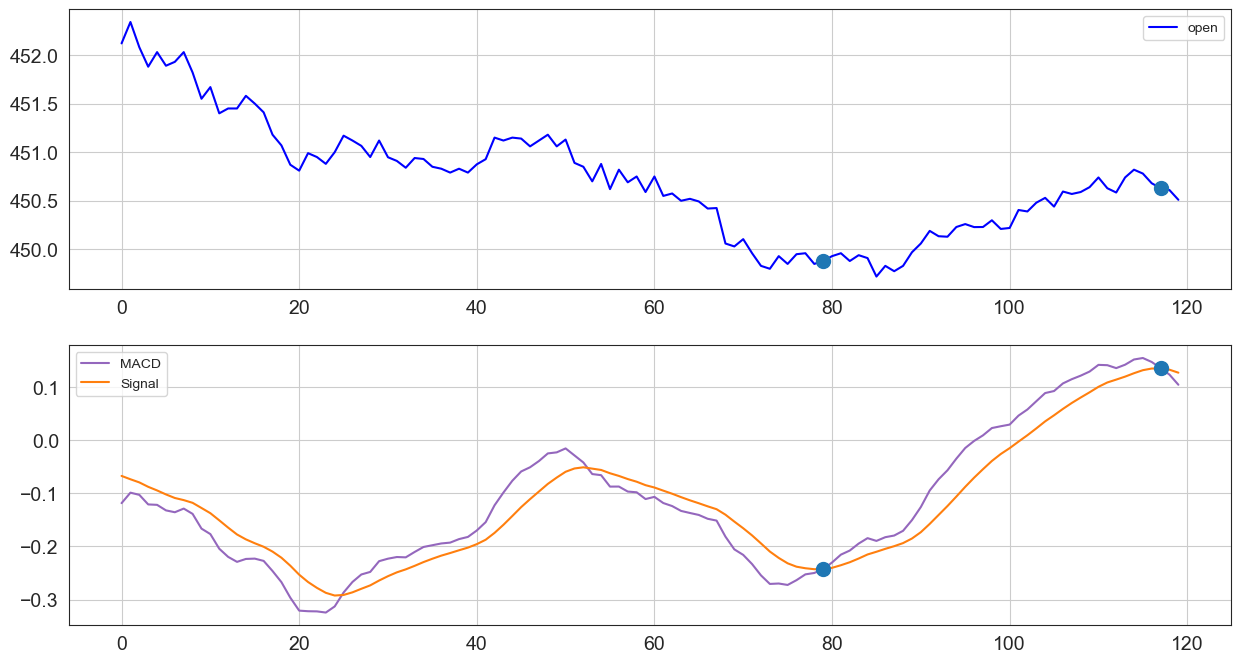

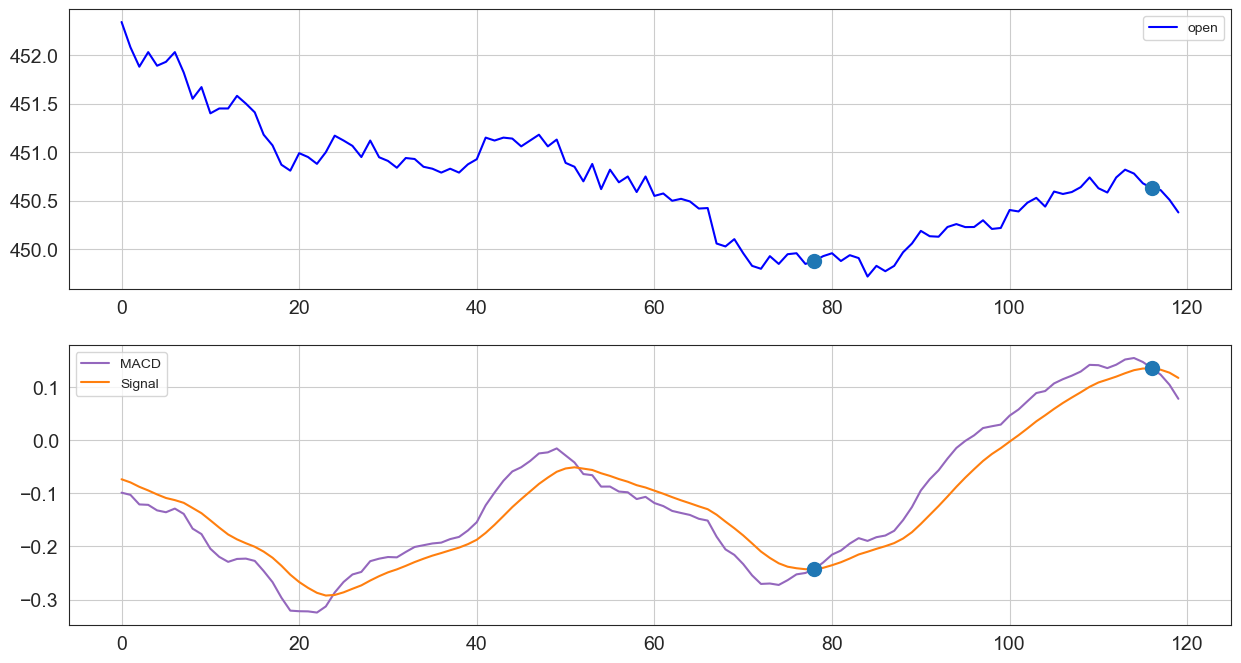

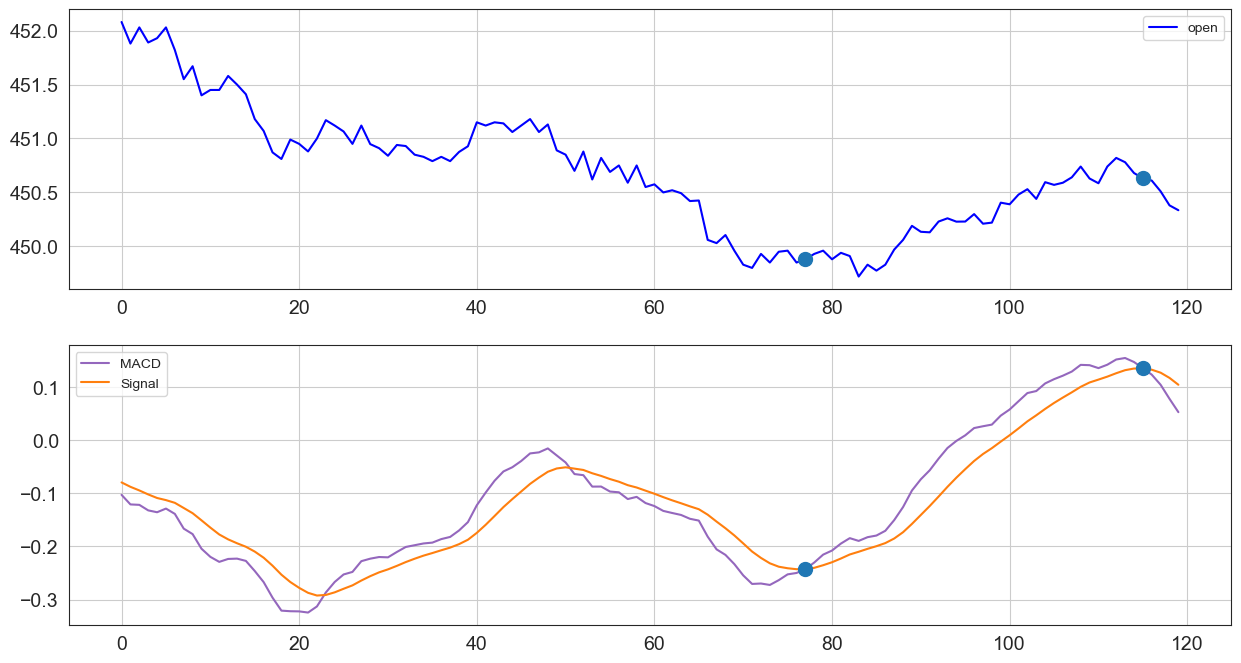

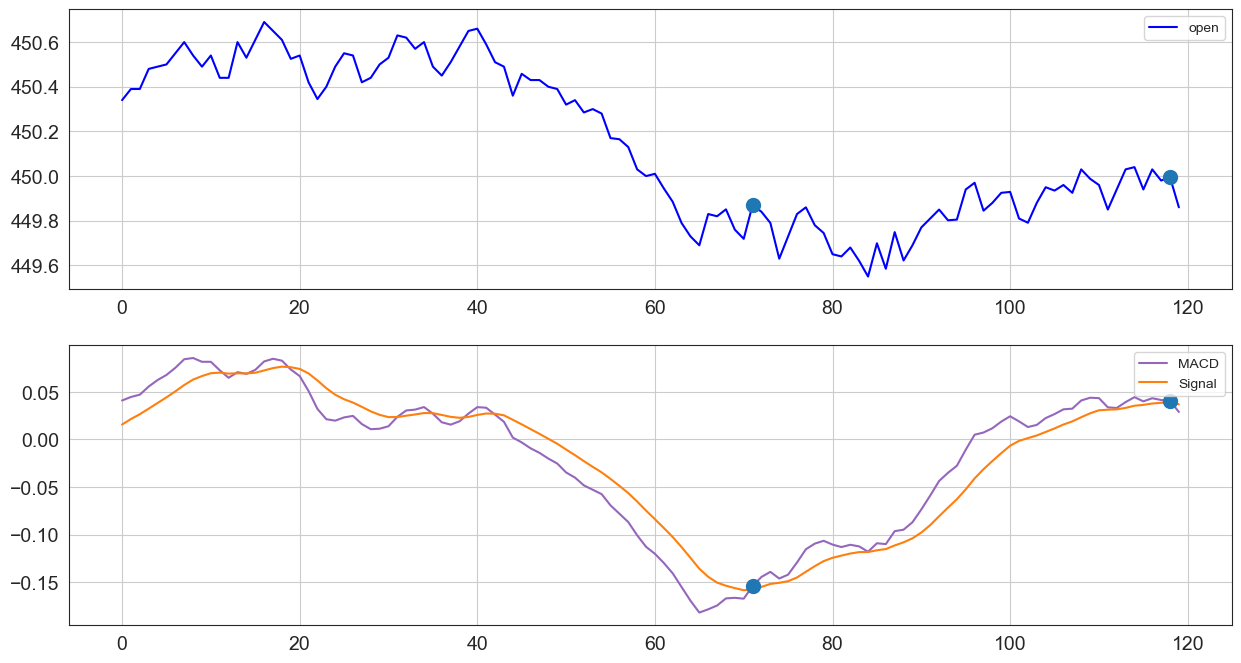

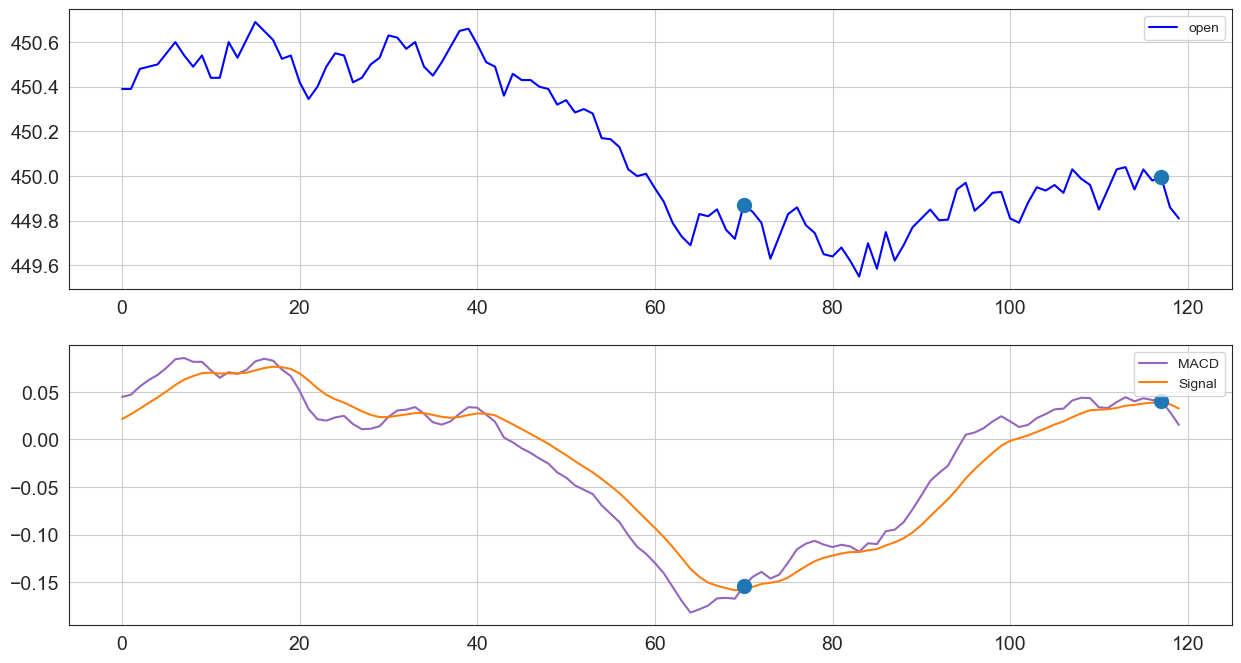

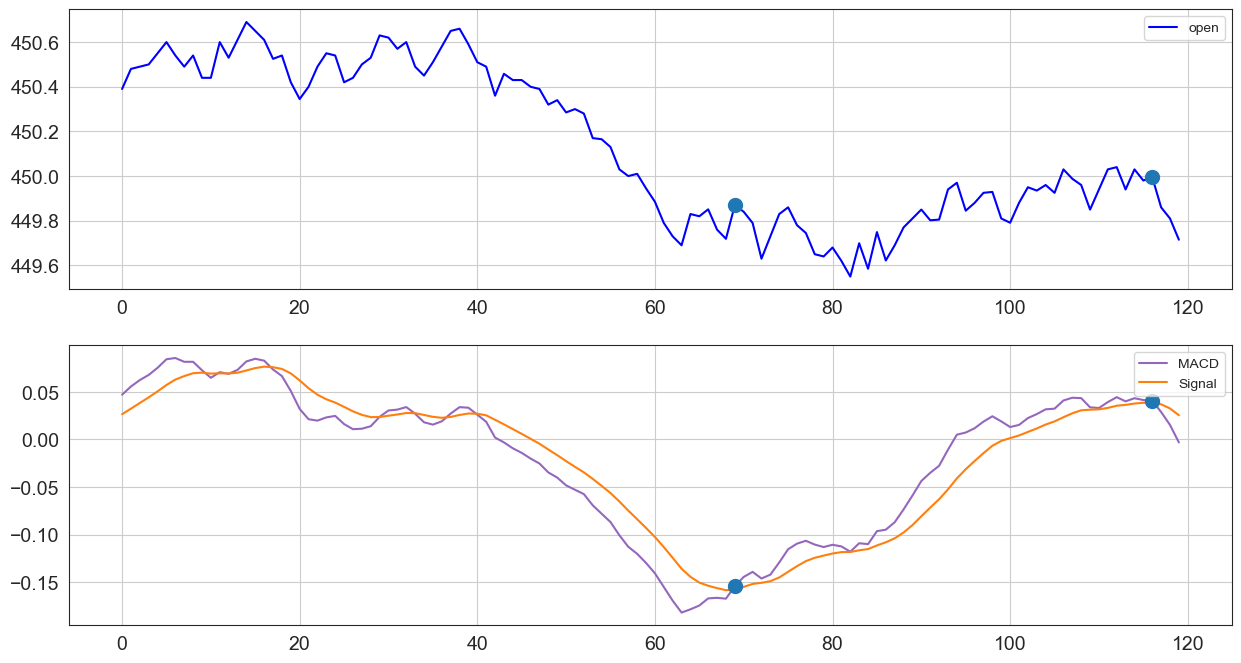

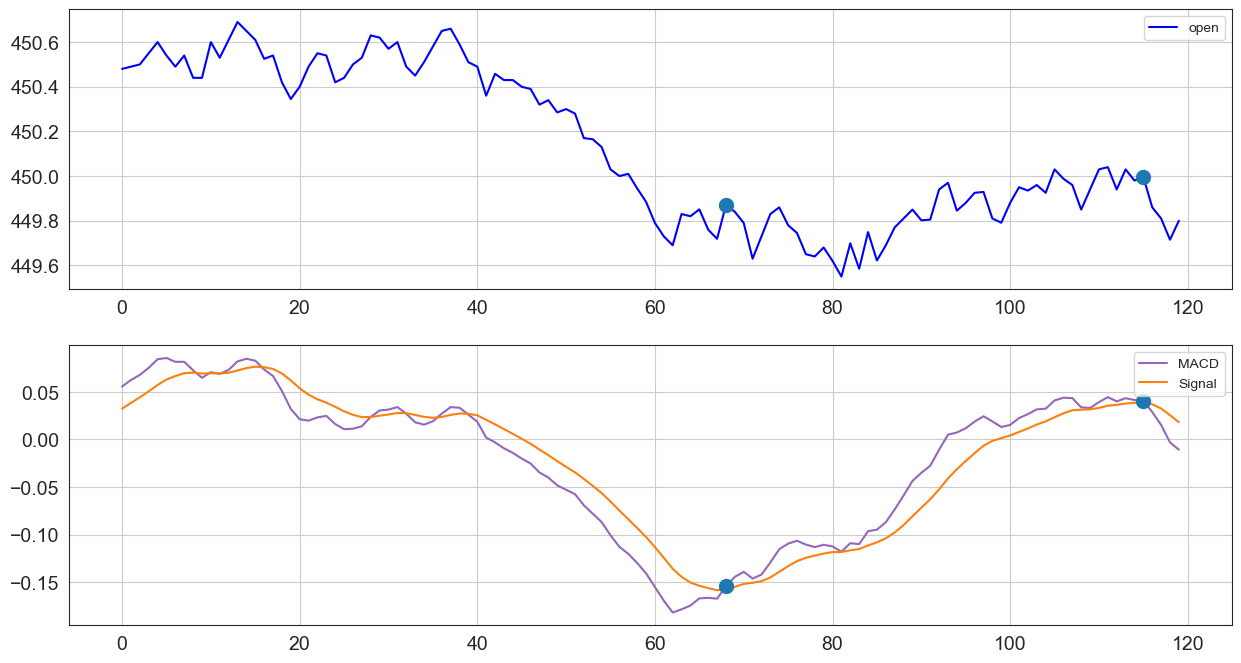

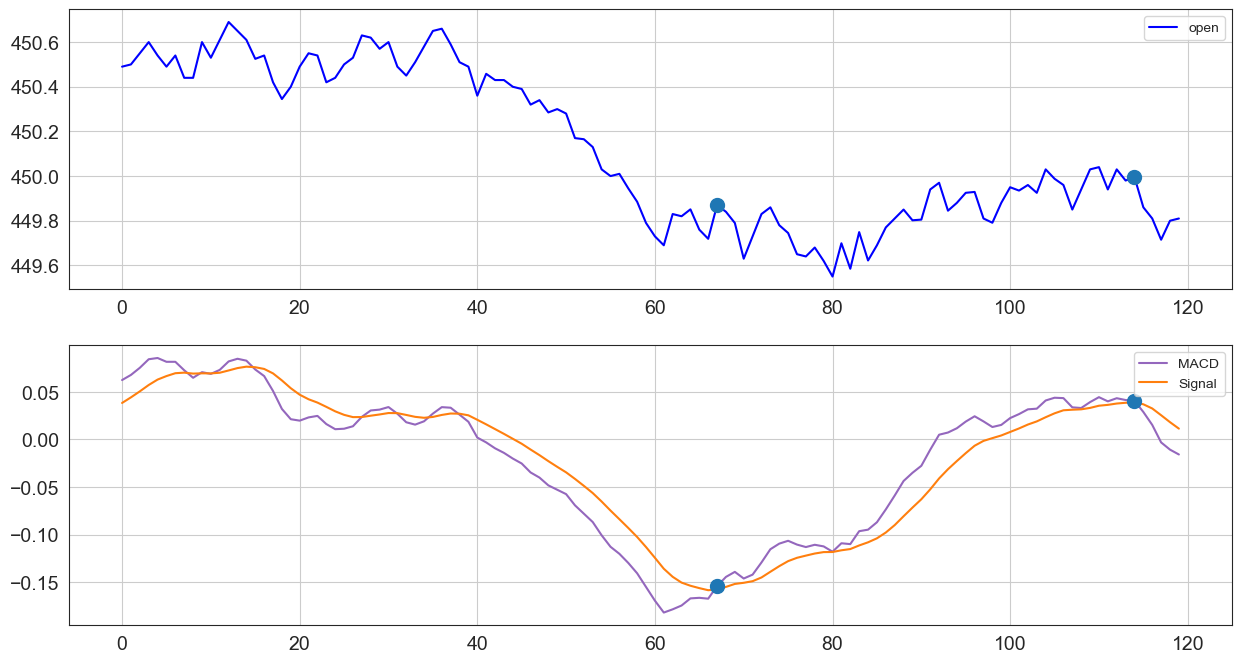

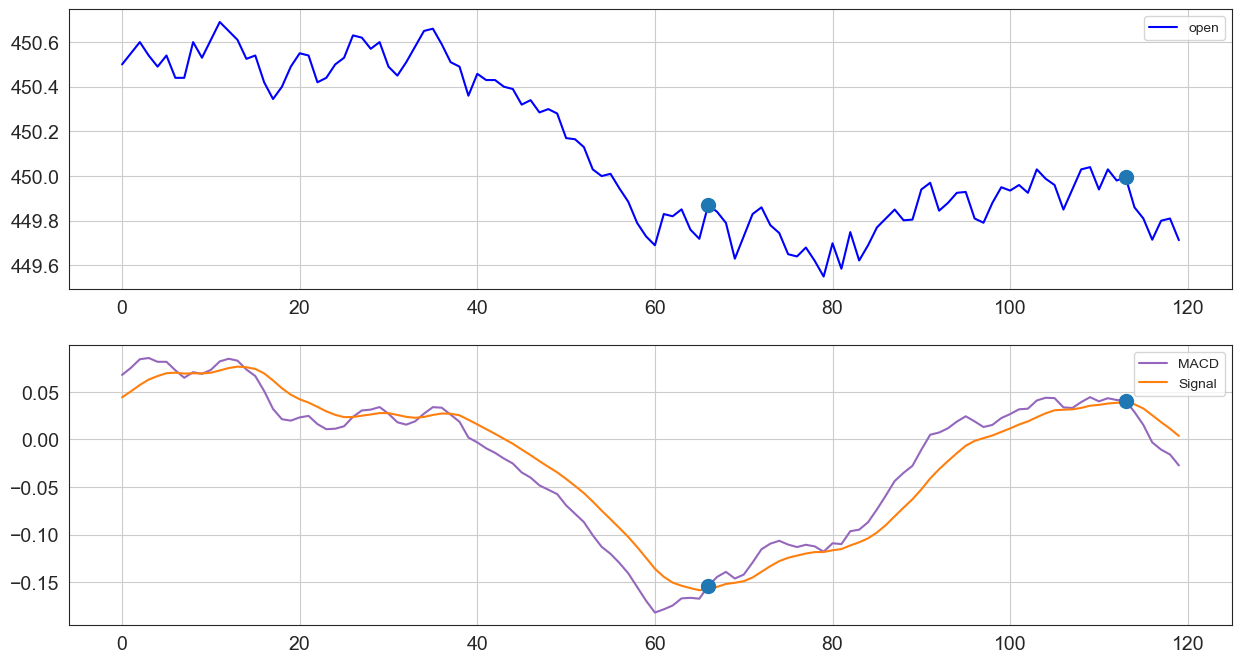

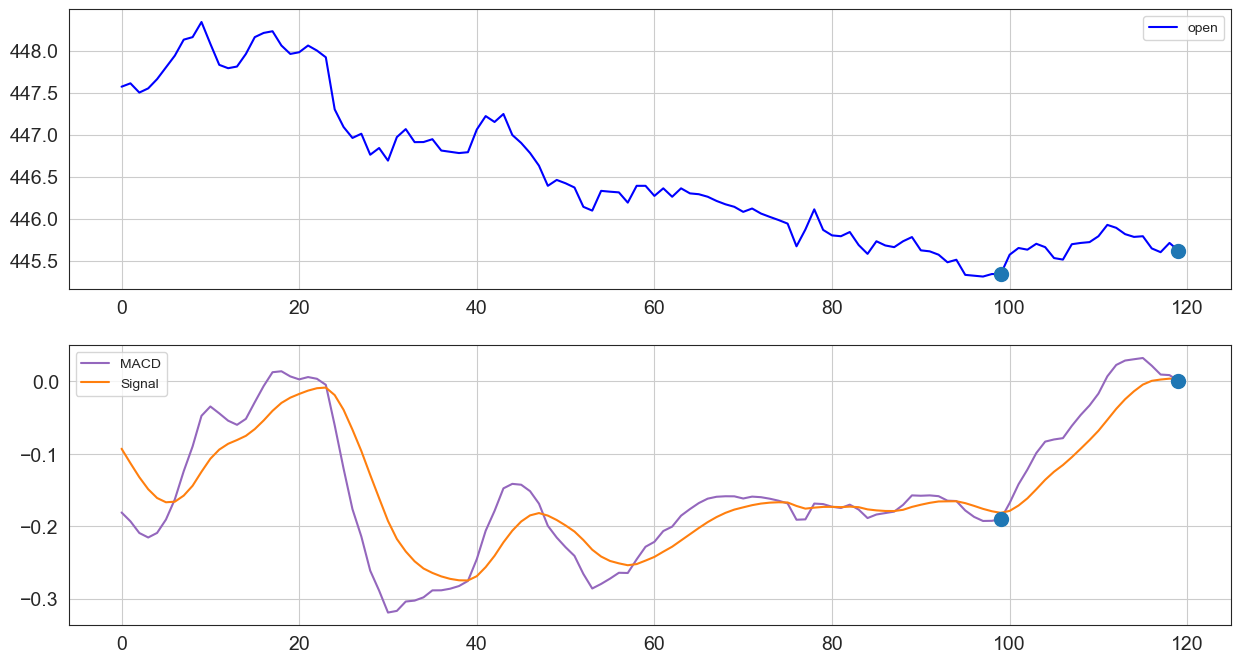

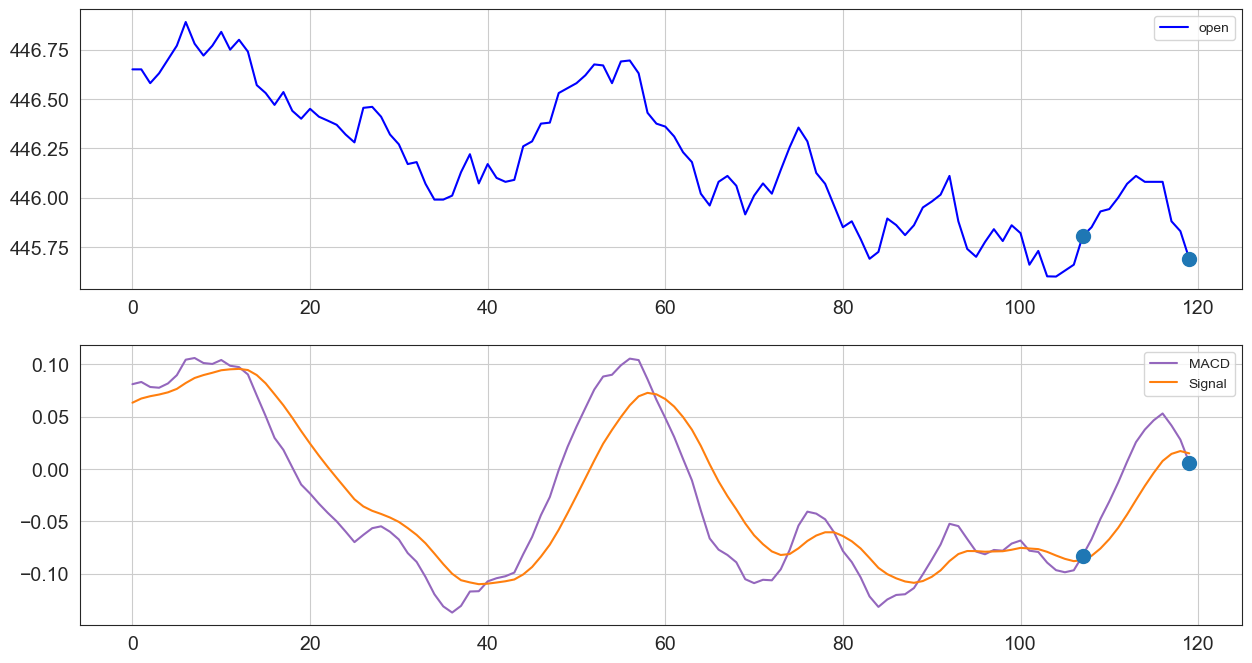

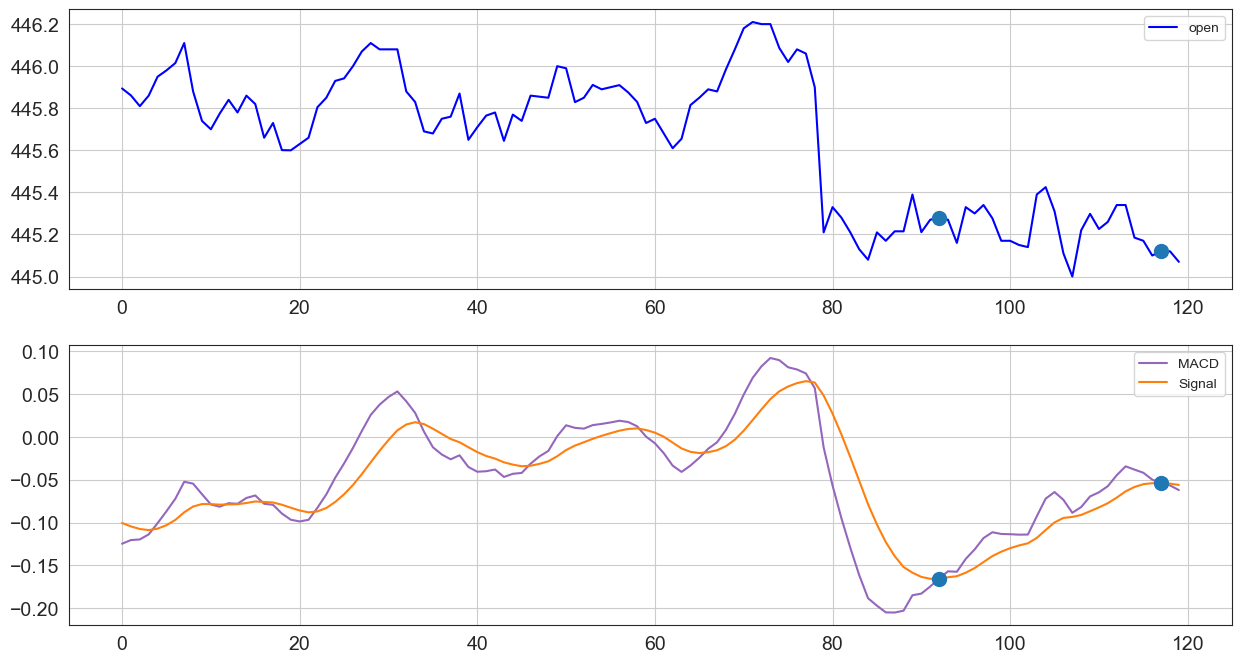

In [3]:
#Visualize those datapoints with large absolute 'crossover' values. The situation is that the MACD change is
#much more than the price change between the two crossover points
idx = X_test[abs(X_test['crossover'])>0.3].index
for i in idx:
    fig, ax = plt.subplots(2,1, figsize = (15,8))
    ax[0].plot(range(120), [X_test.loc[i][f'open {t}'] for t in range(120)],'b',label='open')
    c1 = int(X_test.loc[i]['c1'])
    c2 = int(X_test.loc[i]['c2'])
    ax[0].plot([c1, c2], [X_test.loc[i][f'open {t}'] for t in [c1, c2]],'o', markersize=10)
    ax[1].plot(range(120), [X_test.loc[i][f'MACD {t}'] for t in range(120)],'C4',label='MACD')
    ax[1].plot(range(120), [X_test.loc[i][f'MACD_Signal {t}'] for t in range(120)],'C1',label='Signal')
    ax[1].plot([c1, c2], [X_test.loc[i][f'MACD {t}'] for t in [c1, c2]],'o', markersize=10)
    
    for j in range(2):
        ax[j].tick_params(axis='both', which='major', labelsize=14) 
        ax[j].legend()
        ax[j].grid()
    plt.show()

    

day 0 from 11:30 am to 3 pm


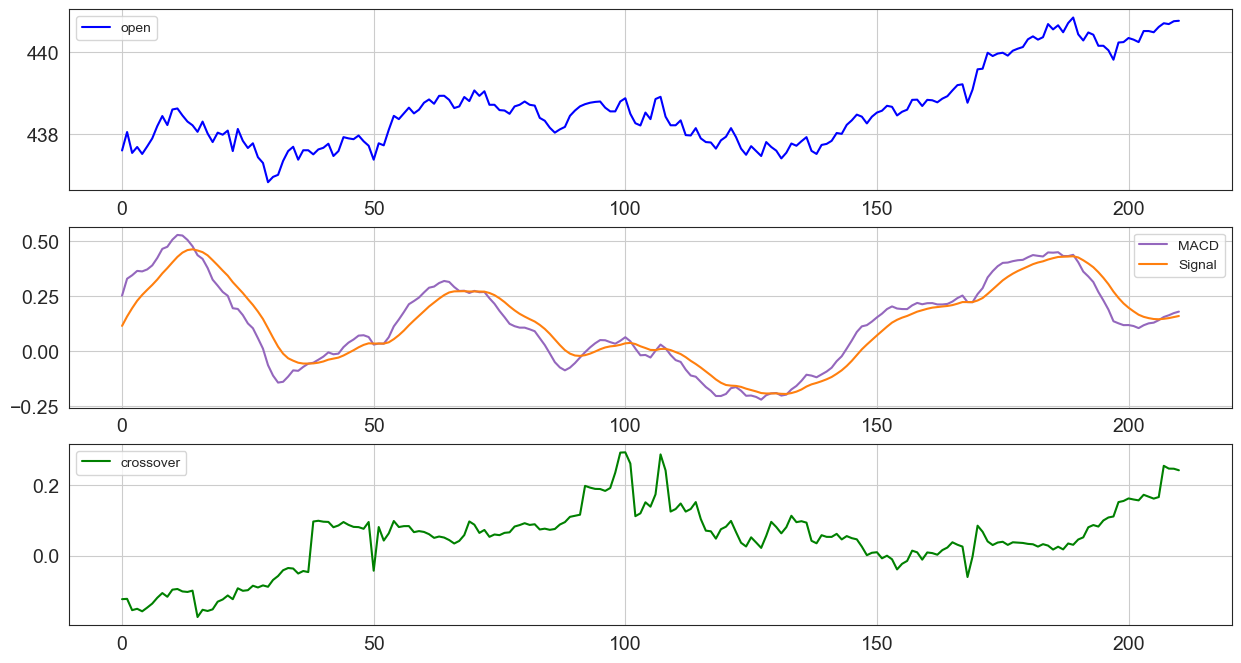

day 1 from 11:30 am to 3 pm


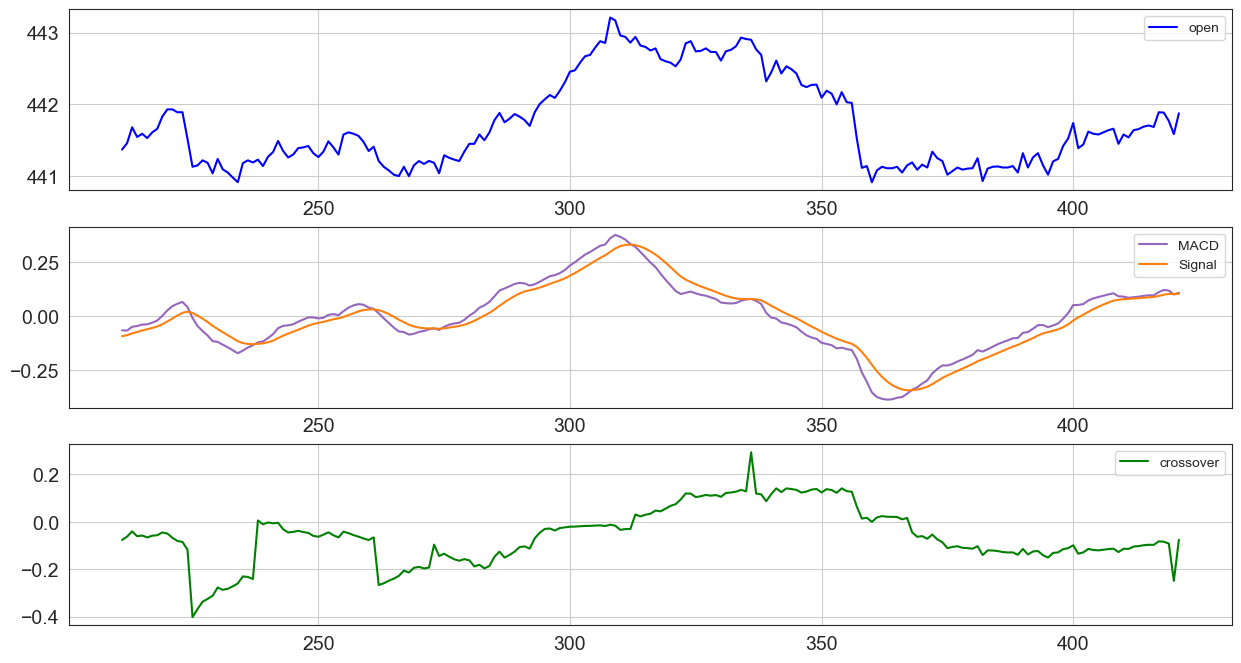

day 2 from 11:30 am to 3 pm


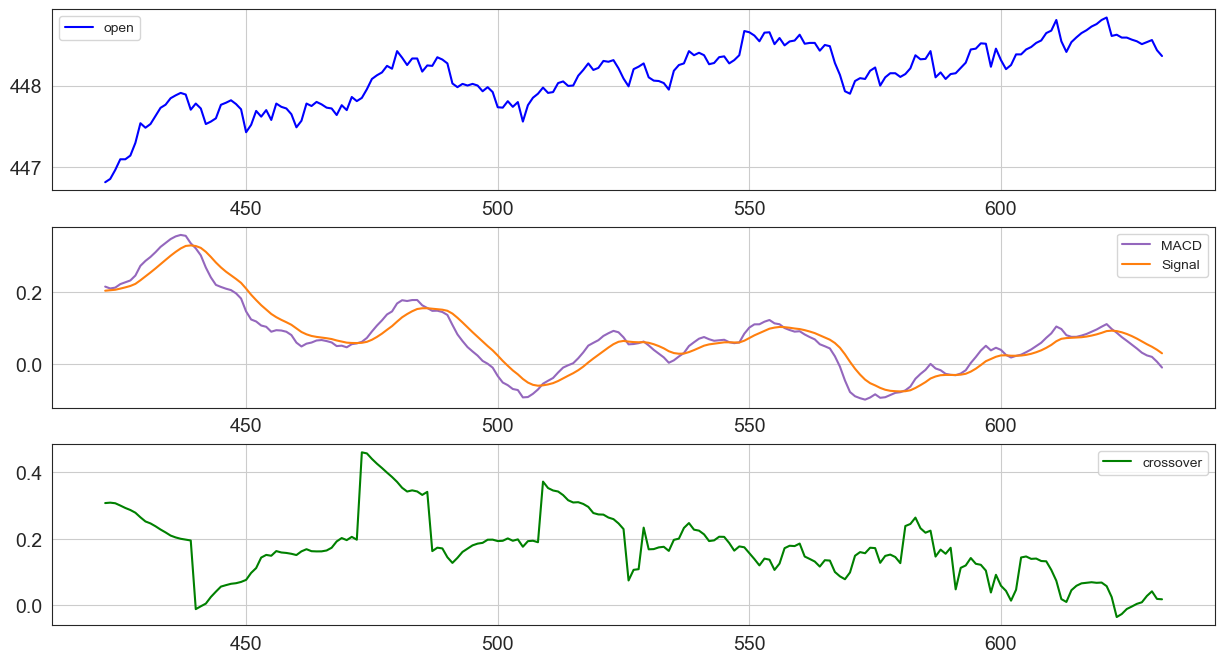

day 3 from 11:30 am to 3 pm


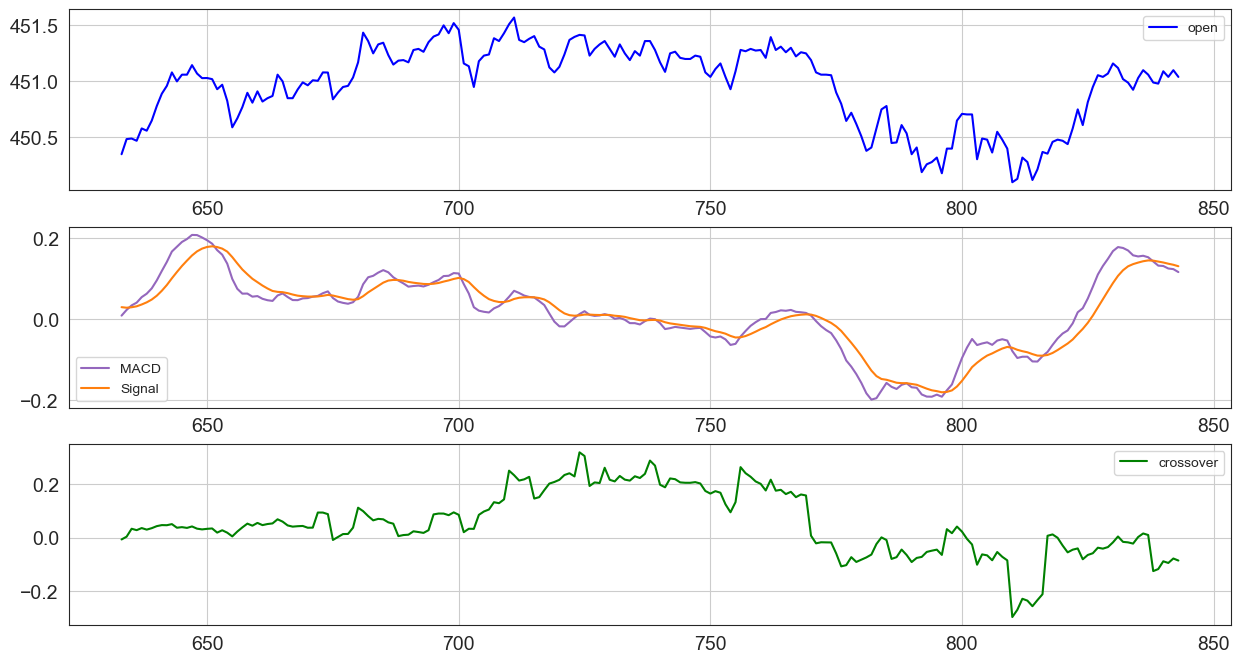

day 4 from 11:30 am to 3 pm


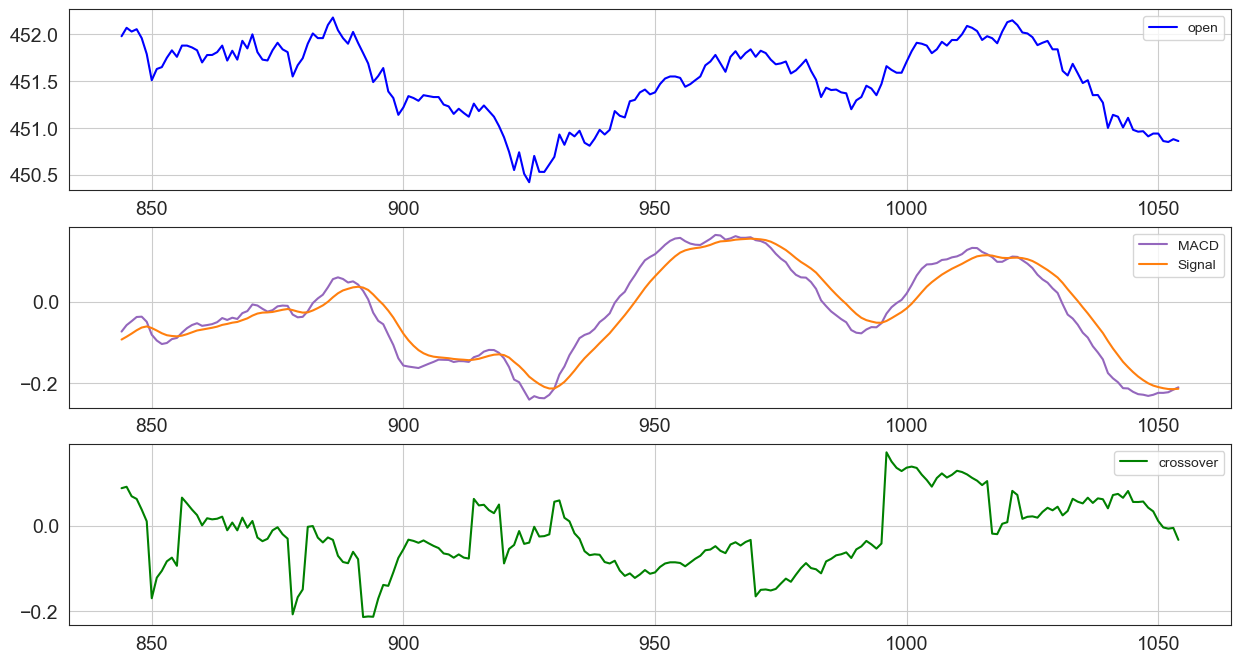

day 5 from 11:30 am to 3 pm


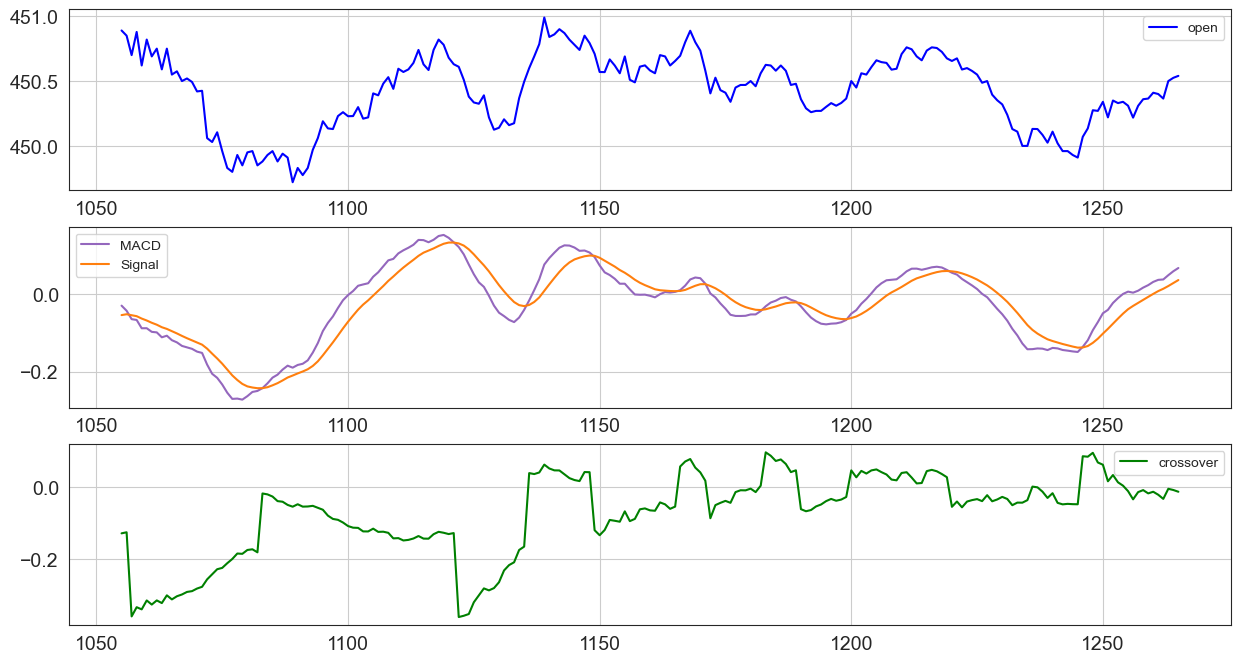

day 6 from 11:30 am to 3 pm


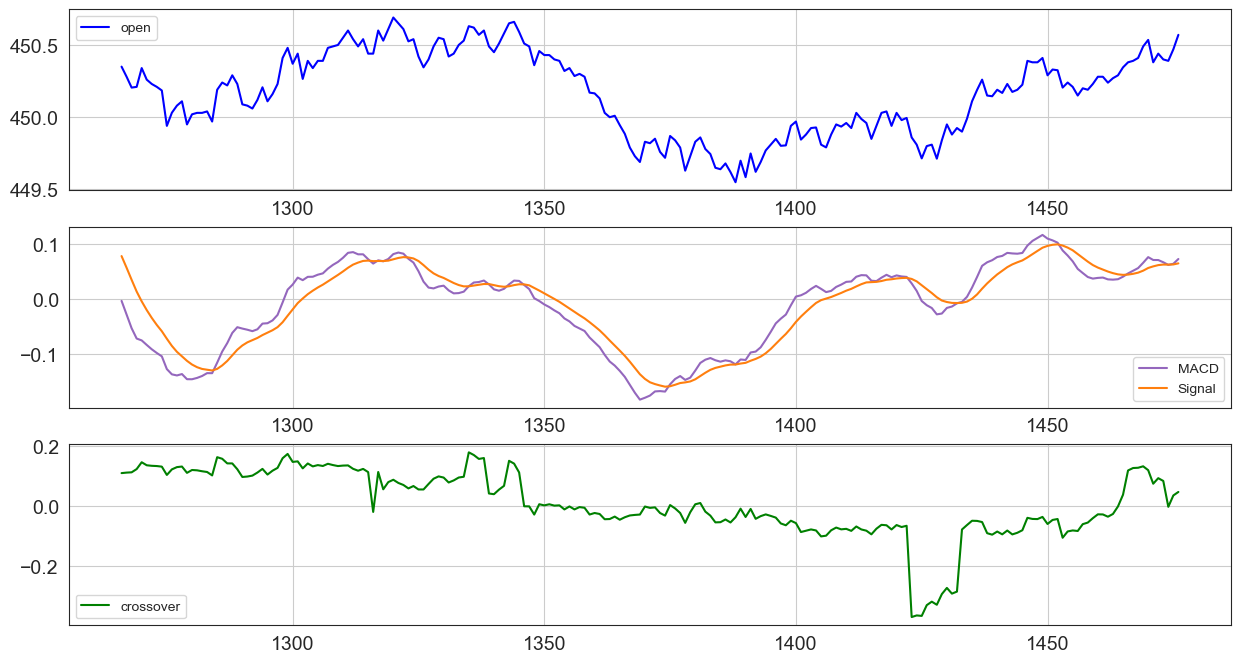

day 7 from 11:30 am to 3 pm


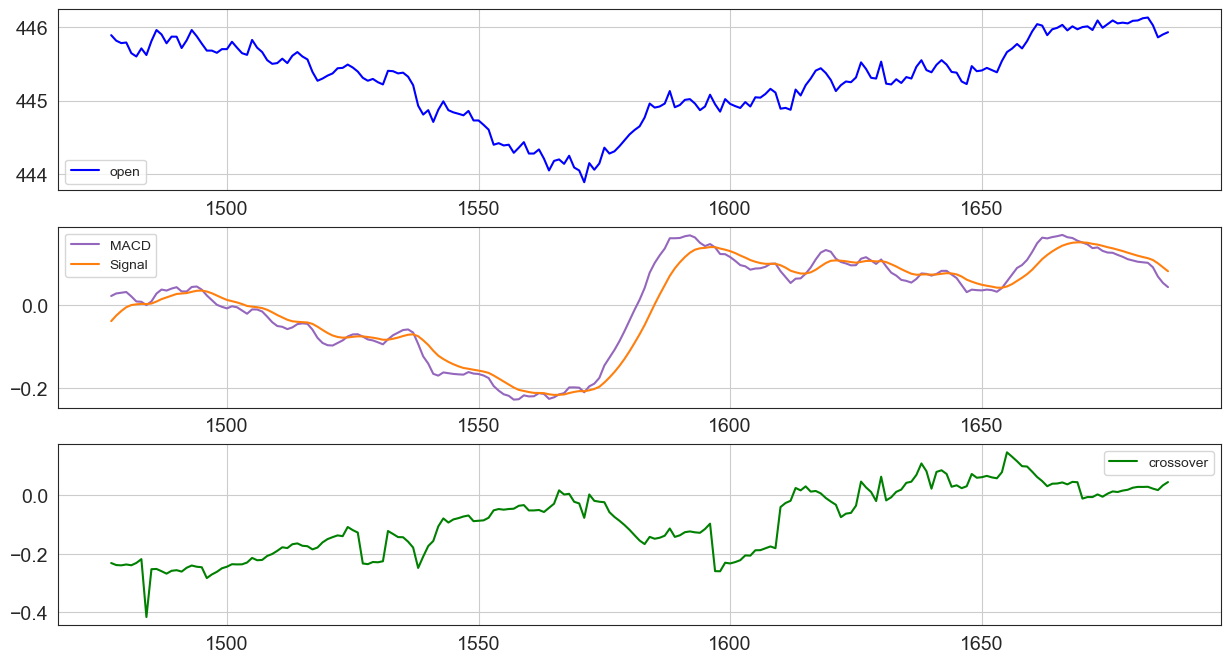

day 8 from 11:30 am to 3 pm


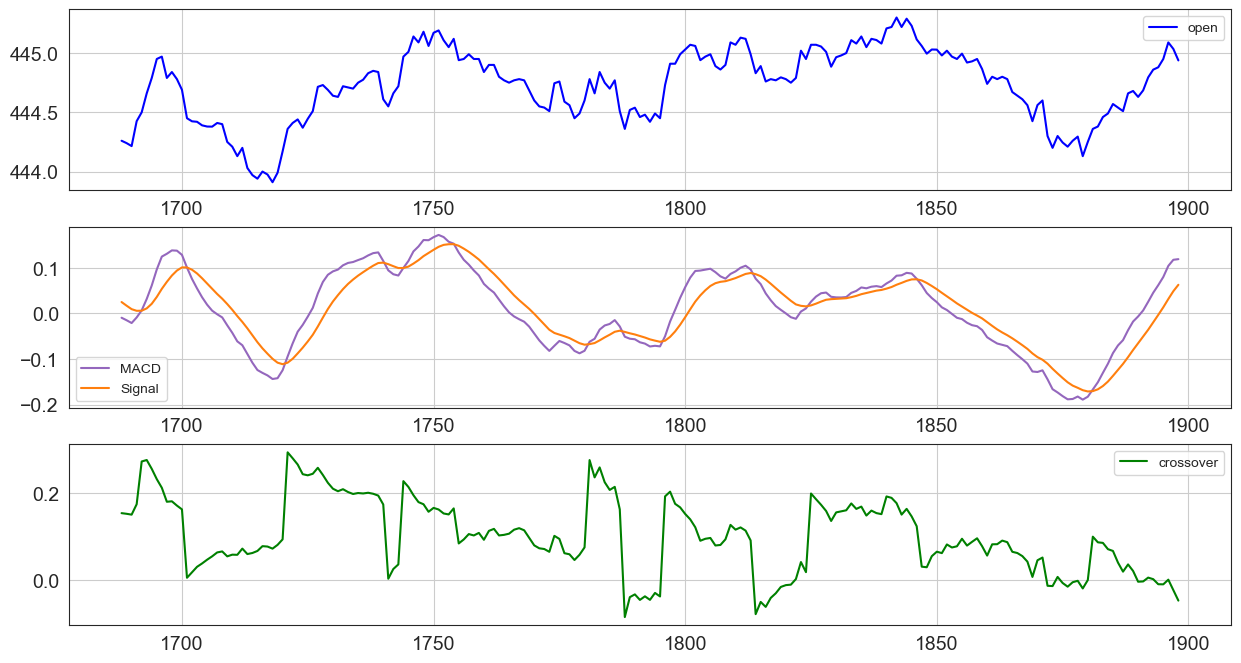

day 9 from 11:30 am to 3 pm


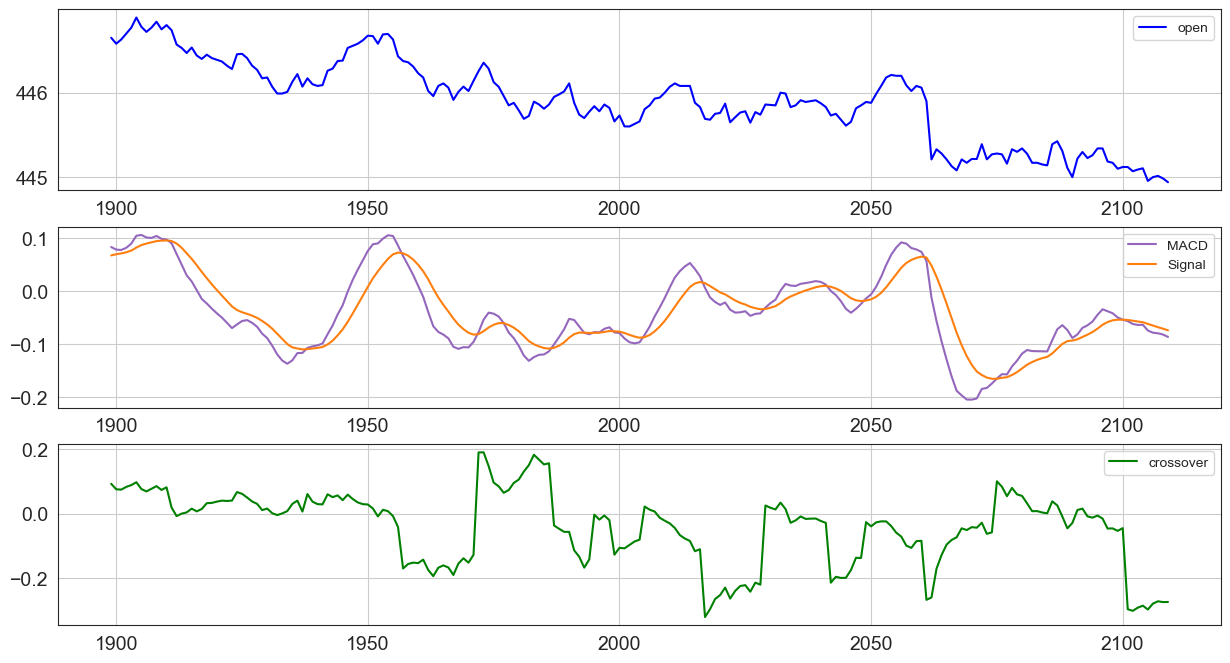

In [7]:
#Visualize the 'crossover' values for each test day
for i in range(n):
    print(f'day {i} from 11:30 am to 3 pm')
    fig, ax = plt.subplots(3,1, figsize = (15,8))
    ax[0].plot(X_test.index[211*i:211*(i+1)], X_test['open 119'].iloc[211*i:211*(i+1)],'b',label='open')
    ax[1].plot(X_test.index[211*i:211*(i+1)], X_test['MACD 119'].iloc[211*i:211*(i+1)],'C4',label='MACD')
    ax[1].plot(X_test.index[211*i:211*(i+1)], X_test['MACD_Signal 119'].iloc[211*i:211*(i+1)],'C1',label='Signal')
    ax[2].plot(X_test.index[211*i:211*(i+1)], X_test['crossover'].iloc[211*i:211*(i+1)],'g',label='crossover')
    for j in range(3):
        ax[j].tick_params(axis='both', which='major', labelsize=14) 
        ax[j].legend()
        ax[j].grid()
    plt.show()

In [145]:
# Backtesting 
def buy(df, buy_ratio, shares, usig, fund, cost):
    idx, wt = usig.pop(0)                  # usig stores the index and weight of the buying signals
    price = df.iloc[idx]['open']
    shares_change = math.floor(buy_ratio * wt * fund / price) # buy_ratio and weight determine the ratio of fund used for buying
    fund -= shares_change * price
    cost = (cost * shares + shares_change * price) / (shares + shares_change)  # update the average cost of current shares
    shares += shares_change
    return shares, fund, cost, idx

def sell(df, sell_ratio, shares, dsig, fund, P_L, cost):
    idx, wt = dsig.pop(0)                 # dsig stores the index and weight of the selling signals
    price = df.iloc[idx]['open']
    shares_change = math.floor(sell_ratio * wt * shares)  # sell_ratio and weight determine the ratio of shares for selling
    shares -= shares_change
    fund += shares_change * price
    P_L += shares_change * (price - cost)    # update the P&L based on the average cost of current shares
    return shares, fund, P_L, idx

def invest(fund, buy_ratio, sell_ratio, cool_down, usig, dsig, df):
    bcd = -cool_down - 1         # the latest buying index with initial value -cool_down-1
    scd = -cool_down - 1         # the latest selling index with initial value -cool_down-1
    scd_list = [0]               # the list containing selling indices for plotting P&L graph
    B_S = True                   # buy/sell state with True being buying and False being selling

    shares = 0                   # current shares held
    cost = 0                     # average cost for current shares
    P_L = 0                      # profit and loss
    P_L_list = [0]               # list of P&L for plotting P&L graph

    while len(usig) != 0 or len(dsig) != 0:
    
        if len(usig) == 0:                        # no buy signals left
            B_S = False
        elif len(dsig) == 0:                      # no sell signals left 
            B_S = True
        else:
            if usig[0][0] < dsig[0][0]:           # deal with earlier signal
                B_S = True
            else:
                B_S = False
        
        if B_S == True:
            if usig[0][0] - bcd < cool_down:        # if within the cool down time, ignore the signal
                usig.pop(0)
                continue
            else:
                shares, fund, cost, bcd = buy(df, buy_ratio, shares, usig, fund, cost)
    
        else:
            if dsig[0][0] - scd < cool_down or shares == 0:  # if within the cool down time or have no shares, ignore the signal
                dsig.pop(0)
                continue
            else:
                shares, fund, P_L, scd = sell(df, sell_ratio, shares, dsig, fund, P_L, cost)
                P_L_list.append(P_L)   
                scd_list.append(scd)
        
    return P_L_list, scd_list, fund, shares, cost

# adjusting buy_ratio, sell_ratio, cool_down to find the optimized parameter
def optimization(initial_fund, usig, dsig, df):
    max_P_L, best_buy, best_sell, best_cool, best_shares, best_cost = 0, 0, 0, 0, 0, 0
    max_P_L_list, max_scd_list = [], []
    
    for buy_ratio in [0.1+0.1*n for n in range(10)]:
        for sell_ratio in [0.1+0.1*n for n in range(10)]:
            for cool_down in range(2, 32, 2):

                fund = initial_fund
                P_L_list, scd_list, fund, shares, cost = invest(fund, buy_ratio, sell_ratio, cool_down, 
                                                                deepcopy(usig), deepcopy(dsig), df)

                if P_L_list[-1] > max_P_L:
                    max_P_L, best_buy, best_sell, best_cool = P_L_list[-1], buy_ratio, sell_ratio, cool_down
                    max_P_L_list, max_scd_list = P_L_list, scd_list
                    
    return max_P_L, best_buy, best_sell, best_cool, max_P_L_list, max_scd_list, shares, cost


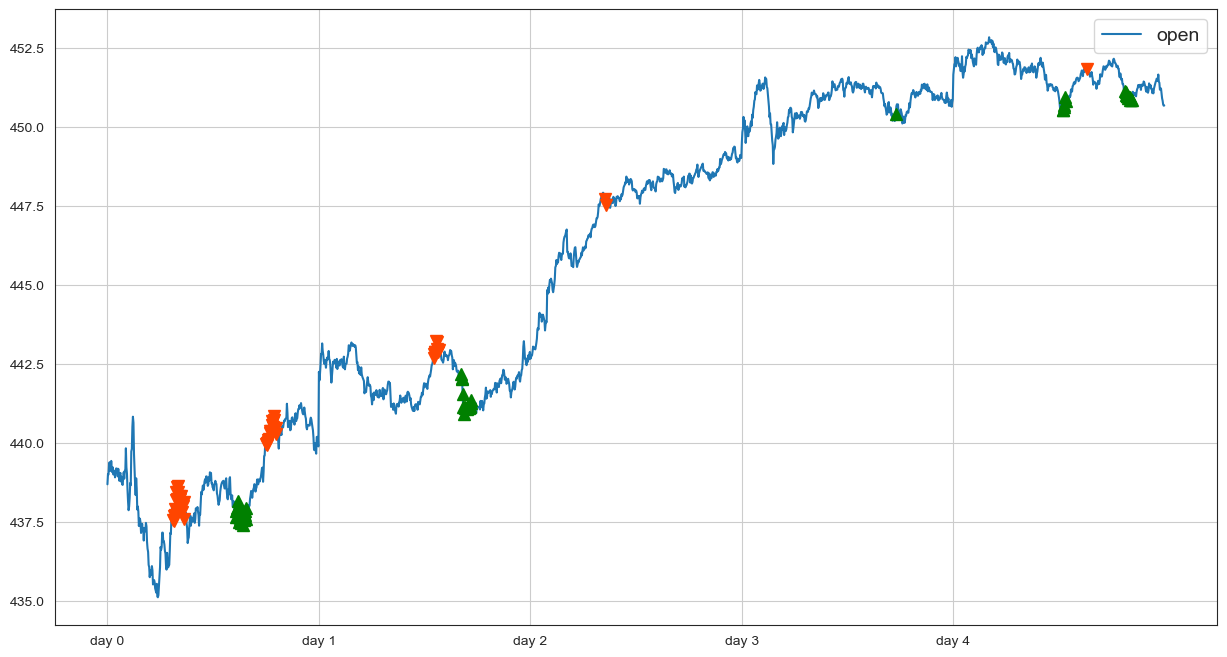

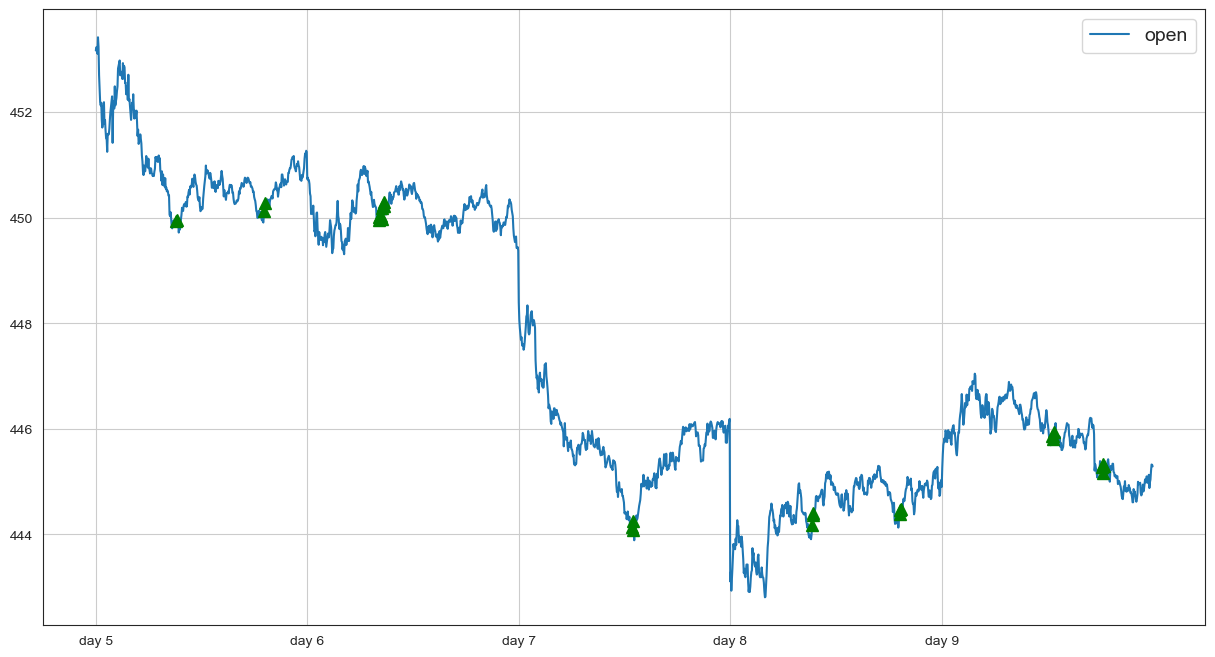

In [157]:
#Make a strategy and apply it to our test data (the last 10 days from 11:30 am to 3 pm)

#get the full data from 9:30 am to 4 pm
dfhlr = pd.read_csv('data/dfhlr.csv', parse_dates=['time'])
X_test_full = dfhlr.iloc[:390*n]
X_test_full = X_test_full.iloc[::-1].reset_index(drop=True)

#going-up indices and weights
uidx = X_test[(X_test['MACD 119']-X_test['crossover']<-0.2) & (X_test['MACD_Signal 119']<-0.1)].index
uweight = [1 for idx in uidx]       # constent weight here 
umax = max(uweight)                 # one can adjust the weight using specific weighting strategy
uweight = [weight / umax for weight in uweight]

#going-down indices and weights
didx = X_test[(X_test['MACD 119']-X_test['crossover']>0.3) & (X_test['MACD_Signal 119']>0.15)].index
dweight = [1 for idx in didx]       # constent weight here 
dmax = max(dweight)                 # one can adjust the weight using specific weighting strategy
dweight = [weight / dmax for weight in dweight]

#transform the index to be consistant with the full day index
uidx = list(map(lambda x: (x//211)*390+120+(x%211), uidx))
didx = list(map(lambda x: (x//211)*390+120+(x%211), didx))

# construct signals
usig = list(zip(uidx, uweight))
dsig = list(zip(didx, dweight))

#plot two graphs visualizing the signals among 10 days
half_len = (n//2)*390
uidx1 = [x for x in uidx if x < half_len]
uidx2 = [x for x in uidx if x >= half_len]
didx1 = [x for x in didx if x < half_len]
didx2 = [x for x in didx if x >= half_len]

plt.figure(figsize = (15,8))
plt.plot(X_test_full.index[:half_len], X_test_full['open'].iloc[:half_len], label='open')
plt.plot(uidx1, [X_test_full.loc[t]['open'] for t in uidx1], marker='^', color='green', linestyle='none', markersize=8)
plt.plot(didx1, [X_test_full.loc[t]['open'] for t in didx1], marker='v', color='orangered', linestyle='none', markersize=8)
plt.legend(fontsize=14)
#Set xticks
xticks = [390 * i for i in range(n//2)]
plt.xticks(ticks=xticks, labels=[f'day {int(tick/390)}' for tick in xticks])
plt.grid()
plt.show()

plt.figure(figsize = (15,8))
plt.plot(X_test_full.index[half_len:], X_test_full['open'].iloc[half_len:], label='open')
plt.plot(uidx2, [X_test_full.loc[t]['open'] for t in uidx2], marker='^', color='green', linestyle='none', markersize=8)
plt.plot(didx2, [X_test_full.loc[t]['open'] for t in didx2], marker='v', color='orangered', linestyle='none', markersize=8)
plt.legend(fontsize=14)
#Set xticks
xticks = [390 * i for i in range(n//2,n)]
plt.xticks(ticks=xticks, labels=[f'day {int(tick/390)}' for tick in xticks])
plt.grid()
plt.show()

P_L: 11082.42
buy_ratio: 1.0
sell_ratio: 0.8
cool_down: 20
current shares: 1131
current cost: 451.12


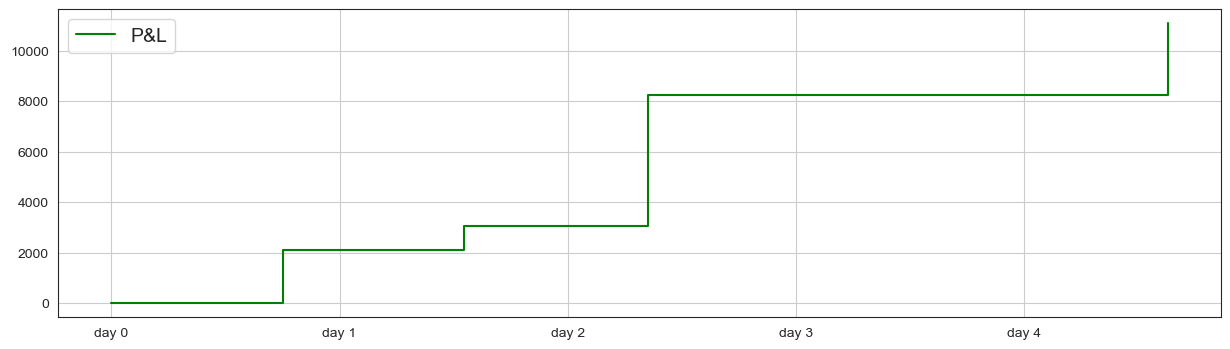

In [159]:
# Backtest the strategy for the last 10 days
fund = 500000
max_P_L, best_buy, best_sell, best_cool, max_P_L_list, max_scd_list, shares, cost = optimization(fund, usig, dsig, X_test_full)

print(f'P_L: {max_P_L:.2f}')
print(f'buy_ratio: {best_buy:.1f}')
print(f'sell_ratio: {best_sell:.1f}')
print('cool_down:', best_cool)
print('current shares:', shares)
print(f'current cost: {cost:.2f}')

# Plot the P&L graph for the first 5 days since there is no selling signal during the next 5 days
plt.figure(figsize = (15,4))
plt.plot(max_scd_list, max_P_L_list, drawstyle='steps-post', label='P&L', color='green')
plt.legend(fontsize=14)
#Set xticks
xticks = [390 * i for i in range(n//2)]
plt.xticks(ticks=xticks, labels=[f'day {int(tick/390)}' for tick in xticks])
plt.grid()
plt.show()


In [162]:
# Backtest the strategy for the whole training set
X = X_train_raw

#going-up indices and weights
uidx = X[(X['MACD 119']-X['crossover']<-0.2) & (X['MACD_Signal 119']<-0.1)].index
uweight = [1 for idx in uidx]         # constant weight
umax = max(uweight)
uweight = [weight / umax for weight in uweight]

#going-down indices and weights
didx = X[(X['MACD 119']-X['crossover']>0.3) & (X['MACD_Signal 119']>0.15)].index
dweight = [1 for idx in didx]        # constant weight
dmax = max(dweight)
dweight = [weight / dmax for weight in dweight]

#transform the index to be consistant with the full day index
uidx = list(map(lambda x: (x//211)*390+120+(x%211), uidx))
didx = list(map(lambda x: (x//211)*390+120+(x%211), didx))

# construct signals
usig = list(zip(uidx, uweight))
dsig = list(zip(didx, dweight))

X_full = pd.read_csv('data/dfhlr.csv', parse_dates=['time'])
X_full = X_full.iloc[::-1].reset_index(drop=True)
X_full

time     open     volume    MACD  MACD_Hist  MACD_Signal  \
0     2023-04-28 09:30:00  411.490   549418.0  0.0294    -0.0109       0.0403   
1     2023-04-28 09:31:00  411.900   306992.0  0.0540     0.0109       0.0430   
2     2023-04-28 09:32:00  411.950   282485.0  0.0766     0.0269       0.0497   
3     2023-04-28 09:33:00  412.140   188445.0  0.1086     0.0471       0.0615   
4     2023-04-28 09:34:00  411.980   222984.0  0.1197     0.0466       0.0732   
...                   ...      ...        ...     ...        ...          ...   
35875 2023-09-08 15:55:00  445.040   425624.0  0.0448     0.0012       0.0437   
35876 2023-09-08 15:56:00  445.200   378042.0  0.0582     0.0116       0.0466   
35877 2023-09-08 15:57:00  445.325  1101354.0  0.0780     0.0251       0.0529   
35878 2023-09-08 15:58:00  445.320  1126246.0  0.0922     0.0315       0.0607   
35879 2023-09-08 15:59:00  445.290  2172819.0  0.0999     0.0313       0.0686   

          high     low   return    hrate%    lrate%    rrate%  
0      414.695  411.49  414.530  0.778877  0.000000  0.738779  
1      414.695  411.90  414.695  0.678563  0.000000  0.678563  
2      414.750  411.95  414.750  0.679694  0.000000  0.679694  
3      414.750  411.98  414.360  0.633280 -0.038822  0.538652  
4      414.750  411.98  414.365  0.672363  0.000000  0.578912  
...        ...     ...      ...       ...       ...       ...  
35875  445.325  445.04  445.290  0.064039  0.000000  0.056175  
35876  445.325  445.20  445.290  0.028077  0.000000  0.020216  
35877  445.325  445.29  445.290  0.000000 -0.007859 -0.007859  
35878  445.320  445.29  445.290  0.000000 -0.006737 -0.006737  
35879  445.290  445.29  445.290  0.000000  0.000000  0.000000  

[35880 rows x 12 columns]

P_L: 47510.59
buy_ratio: 1.0
sell_ratio: 0.9
cool_down: 14
current shares: 1213
current cost: 451.12


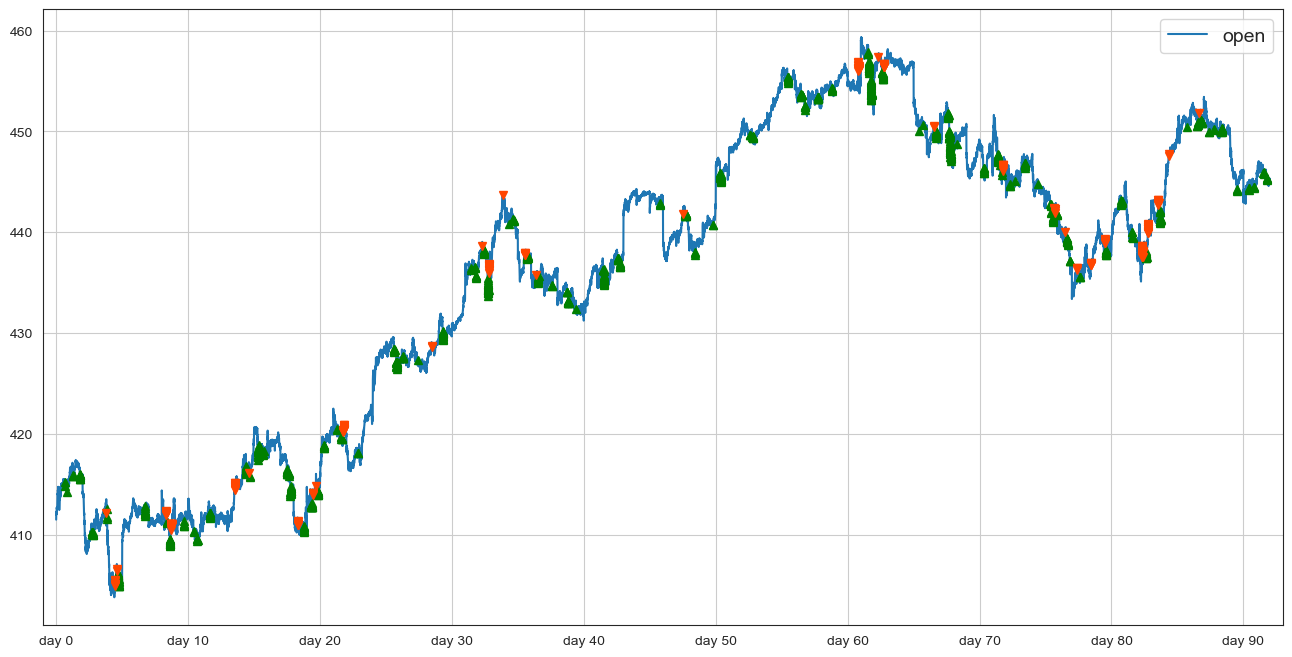

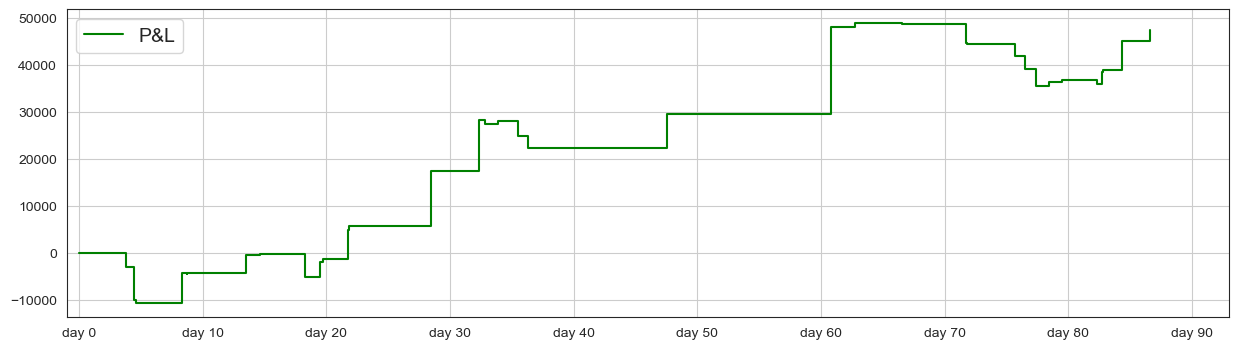

In [163]:
# Backtest the strategy for the whole training set
fund = 500000
max_P_L, best_buy, best_sell, best_cool, max_P_L_list, max_scd_list, shares, cost = optimization(fund, usig, dsig, X_full)

print(f'P_L: {max_P_L:.2f}')
print(f'buy_ratio: {best_buy:.1f}')
print(f'sell_ratio: {best_sell:.1f}')
print('cool_down:', best_cool)
print('current shares:', shares)
print(f'current cost: {cost:.2f}')

# Plot the graph visualizing the signals
plt.figure(figsize = (16,8))
plt.plot(X_full.index, X_full['open'], label='open')
plt.plot(uidx, [X_full.loc[t]['open'] for t in uidx], marker='^', color='green', linestyle='none', markersize=6)
plt.plot(didx, [X_full.loc[t]['open'] for t in didx], marker='v', color='orangered', linestyle='none', markersize=6)
plt.legend(fontsize=14)

#Set xticks
n = int(len(X_full) / 390)
xticks = [3900 * i for i in range((n//10)+1)]
plt.xticks(ticks=xticks, labels=[f'day {int(tick/390)}' for tick in xticks])
plt.xlim(-390, (n+1)*390)
plt.grid()
plt.show()

# Plot the P&L graph
plt.figure(figsize = (15,4))
plt.plot(max_scd_list, max_P_L_list, drawstyle='steps-post', label='P&L', color='green')
plt.legend(fontsize=14)

#Set xticks
xticks = [3900 * i for i in range((n//10)+1)]
plt.xticks(ticks=xticks, labels=[f'day {int(tick/390)}' for tick in xticks])
plt.xlim(-390, (n+1)*390)
plt.grid()
plt.show()
